In [1]:
import seaborn as sns
from matplotlib import pyplot as plt
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import requests
import re
from sklearn.preprocessing import OneHotEncoder, LabelEncoder


# Loading the dataset

In [3]:
df = pd.read_csv('/Users/wairimunganga/Downloads/cars.csv',on_bad_lines='skip',low_memory=False)

# Exploratory Data Analysis on our DataFrame

In [5]:
print("Initial data shape:", df.shape)
print(df.head())

Initial data shape: (34236, 26)
           id                                                url  \
0  7222695916  https://prescott.craigslist.org/cto/d/prescott...   
1  7218891961  https://fayar.craigslist.org/ctd/d/bentonville...   
2  7221797935  https://keys.craigslist.org/cto/d/summerland-k...   
3  7222270760  https://worcester.craigslist.org/cto/d/west-br...   
4  7210384030  https://greensboro.craigslist.org/cto/d/trinit...   

                     region                         region_url  price year  \
0                  prescott    https://prescott.craigslist.org   6000    ?   
1              fayetteville       https://fayar.craigslist.org  11900    ?   
2            'florida keys'        https://keys.craigslist.org  21000    ?   
3  'worcester / central MA'   https://worcester.craigslist.org   1500    ?   
4                greensboro  https://greensboro.craigslist.org   4900    ?   

  manufacturer model condition cylinders  ... size type paint_color image_url  \
0        

###  Summary of statistical measures (count, mean, standard deviation, minimum,  maximum, and percentiles) for each numerical column in the DataFrame

In [7]:
df.describe()

,id,price
count,3.423600e+04,3.423600e+04
mean,7.311948e+09,2.472189e+05
std,5.354992e+06,2.663387e+07
min,7.207408e+09,0.000000e+00
25%,7.309093e+09,3.499000e+03
50%,7.313492e+09,6.000000e+03
75%,7.315583e+09,1.100000e+04
max,7.317095e+09,3.736929e+09


### Number of missing (null) values in each column of our DataFrame

In [9]:
df.isnull().sum()

id              0
url             0
region          0
region_url      0
price           0
year            0
manufacturer    0
model           0
condition       0
cylinders       0
fuel            0
odometer        0
title_status    0
transmission    0
VIN             0
drive           0
size            0
type            0
paint_color     0
image_url       0
description     0
county          0
state           0
lat             0
long            0
posting_date    0
dtype: int64

###  Replacing all occurrences of the string '?' in the DataFrame `df`  with NaN (Not a Number) values.

In [11]:
pd.set_option('future.no_silent_downcasting', True)

In [12]:
df.replace('?', np.nan, inplace=True)
df.infer_objects(copy=False)

,id,url,region,region_url,price,year,manufacturer,model,condition,cylinders,...,size,type,paint_color,image_url,description,county,state,lat,long,posting_date
0,7222695916,https://prescott.craigslist.org/cto/d/prescott...,prescott,https://prescott.craigslist.org,6000,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,az,NaN,NaN,NaN
1,7218891961,https://fayar.craigslist.org/ctd/d/bentonville...,fayetteville,https://fayar.craigslist.org,11900,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,ar,NaN,NaN,NaN
2,7221797935,https://keys.craigslist.org/cto/d/summerland-k...,'florida keys',https://keys.craigslist.org,21000,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,fl,NaN,NaN,NaN
3,7222270760,https://worcester.craigslist.org/cto/d/west-br...,'worcester / central MA',https://worcester.craigslist.org,1500,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,ma,NaN,NaN,NaN
4,7210384030,https://greensboro.craigslist.org/cto/d/trinit...,greensboro,https://greensboro.craigslist.org,4900,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,nc,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34231,7305718110,https://wyoming.craigslist.org/cto/d/thermopol...,wyoming,https://wyoming.craigslist.org,6500,2002.0,ford,'f 350',NaN,NaN,...,NaN,NaN,NaN,https://images.craigslist.org/00404_8EkKcC6XuW...,'2002 Ford f 350 ext cab 295000 miles Power s...,NaN,wy,43.72509,-108.471457,2021-04-12T11:26:07-0600
34232,7305596553,https://wyoming.craigslist.org/cto/d/cheyenne-...,wyoming,https://wyoming.craigslist.org,2800,2000.0,chevrolet,'s10 pickup',NaN,NaN,...,NaN,NaN,NaN,https://images.craigslist.org/00j0j_3i2W0MmbkI...,'2000 Chevy S 10 pick up runs great 142000 mil...,NaN,wy,41.1084,-104.8107,2021-04-12T08:24:13-0600
34233,7305590558,https://wyoming.craigslist.org/cto/d/rawlins-2...,wyoming,https://wyoming.craigslist.org,9000,2015.0,jeep,'wrangler unlimited',salvage,'6 cylinders',...,NaN,SUV,black,https://images.craigslist.org/00909_iyoc54RPpy...,'Salvage title from previous owner Engine dama...,NaN,wy,41.888456,-107.49508300000001,2021-04-12T08:13:21-0600
34234,7305379796,https://wyoming.craigslist.org/cto/d/arapahoe-...,wyoming,https://wyoming.craigslist.org,6500,2011.0,subaru,forester,good,'4 cylinders',...,NaN,NaN,NaN,https://images.craigslist.org/00g0g_lUE50arLcV...,'This vehicle is in great shape! It\'s mechani...,NaN,wy,42.9208,-108.5913,2021-04-11T16:25:00-0600


### New number of missing (null) values in each column of our DataFrame.

In [14]:
df.isnull().sum()

id                  0
url                 0
region              0
region_url          0
price               0
year               67
manufacturer     2432
model            1147
condition        9118
cylinders       11094
fuel              319
odometer          293
title_status      293
transmission      293
VIN             28770
drive           12893
size            18453
type            14125
paint_color     12619
image_url          67
description        69
county          34236
state               0
lat               124
long              124
posting_date       67
dtype: int64

In [15]:
df['manufacturer'].head(50)

0               NaN
1               NaN
2               NaN
3               NaN
4               NaN
5               NaN
6               NaN
7               NaN
8               NaN
9               NaN
10              NaN
11              NaN
12              NaN
13              NaN
14              NaN
15              NaN
16              NaN
17              NaN
18              NaN
19              NaN
20              NaN
21              NaN
22              NaN
23              NaN
24              NaN
25              NaN
26              NaN
27             ford
28           toyota
29              NaN
30            acura
31             ford
32             ford
33        chevrolet
34           toyota
35    mercedes-benz
36        chevrolet
37             ford
38             ford
39        chevrolet
40        chevrolet
41           nissan
42              ram
43            honda
44             ford
45              ram
46           nissan
47            rover
48           toyota
49        chevrolet


In [16]:
pd.set_option('display.max_colwidth', None)
df['description'].head(60)

0                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                       

In [17]:
pd.set_option('display.max_colwidth', None)
df['fuel'].head(60)

0        NaN
1        NaN
2        NaN
3        NaN
4        NaN
5        NaN
6        NaN
7        NaN
8        NaN
9        NaN
10       NaN
11       NaN
12       NaN
13       NaN
14       NaN
15       NaN
16       NaN
17       NaN
18       NaN
19       NaN
20       NaN
21       NaN
22       NaN
23       NaN
24       NaN
25       NaN
26       NaN
27       gas
28       gas
29       gas
30       gas
31       gas
32       gas
33       gas
34       gas
35       gas
36       gas
37       gas
38       gas
39    diesel
40       gas
41       gas
42    diesel
43       gas
44    diesel
45       gas
46       gas
47       gas
48       gas
49       gas
50       gas
51       gas
52       gas
53       gas
54    diesel
55       gas
56       gas
57       gas
58       gas
59       gas
Name: fuel, dtype: object

In [18]:
pd.set_option('display.max_colwidth', None)
df['title_status'].head(60)

0         NaN
1         NaN
2         NaN
3         NaN
4         NaN
5         NaN
6         NaN
7         NaN
8         NaN
9         NaN
10        NaN
11        NaN
12        NaN
13        NaN
14        NaN
15        NaN
16        NaN
17        NaN
18        NaN
19        NaN
20        NaN
21        NaN
22        NaN
23        NaN
24        NaN
25        NaN
26        NaN
27      clean
28      clean
29      clean
30      clean
31      clean
32      clean
33      clean
34      clean
35      clean
36      clean
37      clean
38      clean
39      clean
40      clean
41    rebuilt
42      clean
43      clean
44      clean
45      clean
46      clean
47      clean
48      clean
49      clean
50      clean
51      clean
52      clean
53      clean
54      clean
55      clean
56      clean
57      clean
58      clean
59      clean
Name: title_status, dtype: object

In [19]:
pd.set_option('display.max_colwidth', None)
df['odometer'].head(60)

0          NaN
1          NaN
2          NaN
3          NaN
4          NaN
5          NaN
6          NaN
7          NaN
8          NaN
9          NaN
10         NaN
11         NaN
12         NaN
13         NaN
14         NaN
15         NaN
16         NaN
17         NaN
18         NaN
19         NaN
20         NaN
21         NaN
22         NaN
23         NaN
24         NaN
25         NaN
26         NaN
27    128000.0
28    201300.0
29     47000.0
30     55000.0
31     15996.0
32    150000.0
33       100.0
34    237000.0
35     12774.0
36    131500.0
37    239000.0
38    101000.0
39    102000.0
40    237000.0
41    155000.0
42    211000.0
43     92000.0
44    247000.0
45    104000.0
46    184000.0
47    139445.0
48     20010.0
49    256806.0
50     53320.0
51    201766.0
52    105000.0
53    152400.0
54    102000.0
55     21737.0
56    150000.0
57    222100.0
58    115000.0
59        51.0
Name: odometer, dtype: object

In [20]:
pd.set_option('display.max_colwidth', None)
df['cylinders'].head(60)

0               NaN
1               NaN
2               NaN
3               NaN
4               NaN
5               NaN
6               NaN
7               NaN
8               NaN
9               NaN
10              NaN
11              NaN
12              NaN
13              NaN
14              NaN
15              NaN
16              NaN
17              NaN
18              NaN
19              NaN
20              NaN
21              NaN
22              NaN
23              NaN
24              NaN
25              NaN
26              NaN
27    '6 cylinders'
28    '6 cylinders'
29    '6 cylinders'
30              NaN
31    '8 cylinders'
32              NaN
33              NaN
34    '4 cylinders'
35              NaN
36    '6 cylinders'
37    '8 cylinders'
38              NaN
39    '8 cylinders'
40    '8 cylinders'
41              NaN
42              NaN
43              NaN
44              NaN
45              NaN
46    '6 cylinders'
47    '8 cylinders'
48    '8 cylinders'
49    '4 cylinders'


In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34236 entries, 0 to 34235
Data columns (total 26 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   id            34236 non-null  int64 
 1   url           34236 non-null  object
 2   region        34236 non-null  object
 3   region_url    34236 non-null  object
 4   price         34236 non-null  int64 
 5   year          34169 non-null  object
 6   manufacturer  31804 non-null  object
 7   model         33089 non-null  object
 8   condition     25118 non-null  object
 9   cylinders     23142 non-null  object
 10  fuel          33917 non-null  object
 11  odometer      33943 non-null  object
 12  title_status  33943 non-null  object
 13  transmission  33943 non-null  object
 14  VIN           5466 non-null   object
 15  drive         21343 non-null  object
 16  size          15783 non-null  object
 17  type          20111 non-null  object
 18  paint_color   21617 non-null  object
 19  imag

# Handling Missing Values
## We are going to use the description column to extract and update data for the different columns:
## # 1. Manufacturer

### Number of 'NaN' in the "manufacturer' column

In [24]:
print("Current nulls in manufacturer column :", df['manufacturer'].isna().sum())

Current nulls in manufacturer column : 2432


### Extracting and updating the 'manufacturer' NaN values

In [26]:
def extract_manufacturer(description):
    if not isinstance(description, str):
        return None

    manufacturers = [
 # American Brands
'Ford', 'Chevy', 'Chevrolet', 'Dodge', 'Chrysler', 'Jeep', 'Cadillac', 'Buick', 
'GMC', 'Ram', 'Lincoln', 'Tesla', 'Pontiac', 'Saturn', 'Hummer', 'Oldsmobile',
'Rivian', 'Lucid', 'Polestar', 'Faraday Future', 'Karma',

# European Brands
'BMW', 'Audi', 'Mercedes', 'Volkswagen', 'Porsche', 'Land Rover', 'Jaguar', 
'Rolls-Royce', 'Bentley', 'Aston Martin', 'Ferrari', 'Lamborghini', 'McLaren', 
'Alfa Romeo', 'Fiat', 'Mini', 'Opel', 'Peugeot', 'Renault', 'Citroën', 
'Skoda', 'Seat', 'Pagani', 'Daimler', 'Smart', 'Iveco', 'MAN', 'Scania',
'Bugatti', 'Zagato', 'Wiesmann', 'Morgan', 'Lancia', 'Saab', 'Pininfarina',
'Bristol', 'DeLorean', 'Donkervoort', 'Ginetta', 'Gordon-Keeble', 'Hispano-Suiza',
'Isotta Fraschini', 'Lagonda', 'Maserati', 'Maybach', 'Monteverdi', 'Rover',
'Sbarro', 'SPYKER', 'TVR', 'Zenvo', 'Alpina', 'Quattroporte',

# Asian Brands
'Toyota', 'Honda', 'Nissan', 'Hyundai', 'Kia', 'Subaru', 'Mazda', 'Infiniti', 
'Acura', 'Lexus', 'Genesis', 'Mitsubishi', 'Suzuki', 'Daihatsu', 'Isuzu', 
'Hino', 'Proton', 'Perodua', 'Tata', 'Mahindra', 'Maruti Suzuki', 'SAIC', 
'Geely', 'Great Wall', 'Changan', 'Hongqi', 'Zotye', 'BYD', 'NIO', 'XPeng', 
'Dongfeng', 'Haval', 'GAC', 'JAC', 'JMC', 'Baojun', 'Brilliance', 'Chery',
'Jiangling', 'Lifan', 'Qiantu', 'SAIC-GM', 'Soda', 'Weichai', 'Wuling', 
'Yulon', 'Hubei', 'Daewoo', 'Seongdong', 'SSangYong', 'Eicher'
]
    description = description.lower()
    for manufacturer in manufacturers:
        if manufacturer.lower() in description:
            return manufacturer
    return None

# Initialize an empty list to track identified manufacturers
identified_manufacturers = []

def update_manufacturer(description):
    manufacturer = extract_manufacturer(description)
    if manufacturer and manufacturer not in identified_manufacturers:
        identified_manufacturers.append(manufacturer)
    return manufacturer

df.loc[df['manufacturer'].isna(), 'manufacturer'] = df.loc[df['manufacturer'].isna(), 'description'].apply(update_manufacturer)

# List of identified manufacturers
# print("Identified Manufacturers:", identified_manufacturers)

### Number of 'NaN' in the "manufacturer' column after cleaning

In [28]:
print("Current nulls in manufacturer column after cleaning :", df['manufacturer'].isna().sum())

Current nulls in manufacturer column after cleaning : 1396


In [29]:
df['manufacturer'].head(50)

0              None
1              None
2              None
3              None
4              None
5              None
6              None
7              None
8              None
9              None
10             None
11             None
12             None
13             None
14             None
15             None
16             None
17             None
18             None
19             None
20             None
21             None
22             None
23             None
24             None
25             None
26             None
27             ford
28           toyota
29            Chevy
30            acura
31             ford
32             ford
33        chevrolet
34           toyota
35    mercedes-benz
36        chevrolet
37             ford
38             ford
39        chevrolet
40        chevrolet
41           nissan
42              ram
43            honda
44             ford
45              ram
46           nissan
47            rover
48           toyota
49        chevrolet


## # 2. Model

### Number of 'NaN' in the "model' column

In [32]:
print("Current nulls in model column :", df['model'].isna().sum())

Current nulls in model column : 1147


### Extracting and updating the 'model' NaN values

In [34]:
def extract_model(description):
    models = [
        # American Brands
        'F-150', 'Tacoma', 'Civic', 'Camry', 'Altima', 'Corolla', 'Mustang', 'Impala', 
        'Challenger', 'Cherokee', 'Silverado', 'Ram 1500', 'Explorer', 'Fusion', 
        'Equinox', 'Escalade', 'GTO', 'Grand Cherokee', 'CTS', 'Buick Enclave', 
        'Traverse', 'Ranger', 'Journey', 'Durango', 'Wrangler', 'Sierra', '300', 
        'Fusion', 'Edge', 'Focus', 'Grand Am', 'Mondeo', 'F-250', 'Malibu', 
        'Navigator', 'V6 Mustang', 'Mustang GT', 'G8', 'S2000', 'Sonata', 'Tundra',
        
        # European Brands
        '3 Series', 'C-Class', 'A4', 'X5', 'Q5', 'E-Class', 'Golf', 'A3', 'Passat', 
        'S-Class', 'M3', 'A6', '911', 'Macan', 'Panamera', 'F-Type', 'Range Rover', 
        'Continental', 'Vantage', 'Aston Martin DB11', 'DB9', '458 Italia', 'Huracan', 
        'A8', 'TT', 'S4', 'X3', 'Z4', 'Boxster', 'M5', 'M4', '458 Spider', 
        'Bentayga', 'V12 Vantage', 'Mulsanne', 'Cayman', 'Macan Turbo', 'Cayenne', 
        '458 Speciale', 'Evoque', 'Tiguan', 'Maserati Ghibli', 'Fiat 500', 
        'Renault Clio', 'Jaguar XE', 'DBX', 'GT3', 'Coupe', 'SLK', 'G-Class', 
        'GTR', 'Q7', 'S5', 'GTS', 'X4', 'Wraith', 'V8 Vantage', 'Ghost',

        # Asian Brands
        'Accord', 'Altima', 'Camry', 'Civic', 'Corolla', 'CR-V', 'Forester', 'Mazda3',
        'Mazda6', 'Outback', 'RAV4', 'Sorento', 'Soul', 'Tucson', 'Santa Fe', 
        'Kona', 'Pathfinder', 'Murano', 'Juke', 'Qashqai', 'X-Trail', 'Hatchback',
        'CX-5', 'RX', 'NX', 'IS', 'GS', 'ES', 'LX', 'Pilot', 'Odyssey', 'Fit',
        'Venza', 'Avalon', 'Sienna', 'Soul', '350Z', '370Z', 'Versa', 'Maxima', 
        'Optima', 'K5', 'Forte', 'Tucson', 'Palisade', 'Sportage', 'Kona', 
        'Impreza', 'Legacy', 'Ascent', 'Tribeca', 'Outback', 'Legacy',
        
        # Additional Models
        'X1', 'X2', 'X4', 'X6', 'Q3', 'Q4', 'Q8', 'R8', 'S7', 'S8', 'Tiguan', 
        'Jetta', 'Polo', 'Yaris', 'Land Cruiser', 'Hilux', 'Fortuner', 'Celerio', 
        'Swift', 'Kizashi', 'SX4', 'Brio', 'City', 'Lancer', 'ASX', 'RVR', 
        'Astra', 'Juke', 'Micra', 'Frontier', 'Rogue', 'GT-R', 'Aventador', 
        'DBS', 'Z4', 'M6', 'RCF', 'G70', 'Stinger', 'K900', 'Ioniq', 'EV6',
    ]
    
    if isinstance(description, str):
        description = description.lower()
        for model in models:
            if model.lower() in description:
                return model
    return None

In [35]:
# Initialize an empty list to track identified models
identified_models = []

def update_model(description):
    model = extract_model(description)
    if model and model not in identified_models:
        identified_models.append(model)
    return model

df.loc[df['model'].isna(), 'model'] = df.loc[df['model'].isna(), 'description'].apply(update_model)

# Print or use the list of identified models
# print("Identified Models:", identified_models)

### Number of 'NaN' in the "model' column after cleaning

In [37]:
print("Current nulls in model column after cleaning :", df['model'].isna().sum())

Current nulls in model column after cleaning : 199


### Identifying whether the 'model' column can be used to fill in the empty 'manufacturers' column

#### Number of rows where 'model' is NaN and 'description' is not NaN

In [40]:
count = df[df['model'].isna() & df['description'].notna()].shape[0]
print("Number of rows where 'model' is NaN and 'description' is not NaN:", count)

Number of rows where 'model' is NaN and 'description' is not NaN: 132


#### Number of rows where 'manufacturer' is NaN and 'description' is not NaN

In [42]:
count = df[df['manufacturer'].isna() & df['description'].notna()].shape[0]
print("Number of rows where 'manufacturer' is NaN and 'description' is not NaN:", count)

Number of rows where 'manufacturer' is NaN and 'description' is not NaN: 1329


#### Mapping each unique car model to its corresponding manufacturer

In [44]:
model_to_manufacturer = df[['model', 'manufacturer']].dropna().drop_duplicates().set_index('model')['manufacturer'].to_dict()

#### Updating the 'manufacturer' column in `df` by using a lambda function

In [46]:
df['manufacturer'] = df.apply(
    lambda row: model_to_manufacturer.get(row['model'], row['manufacturer']),
    axis=1
)

### Number of 'NaN' in the "manufacturer' column after clean up

In [48]:
print("Current nulls in manufacturer column after cleaning :", df['manufacturer'].isna().sum())

Current nulls in manufacturer column after cleaning : 1026


## # 3. Fuel

In [50]:
print(df['fuel'].head(50))

0        NaN
1        NaN
2        NaN
3        NaN
4        NaN
5        NaN
6        NaN
7        NaN
8        NaN
9        NaN
10       NaN
11       NaN
12       NaN
13       NaN
14       NaN
15       NaN
16       NaN
17       NaN
18       NaN
19       NaN
20       NaN
21       NaN
22       NaN
23       NaN
24       NaN
25       NaN
26       NaN
27       gas
28       gas
29       gas
30       gas
31       gas
32       gas
33       gas
34       gas
35       gas
36       gas
37       gas
38       gas
39    diesel
40       gas
41       gas
42    diesel
43       gas
44    diesel
45       gas
46       gas
47       gas
48       gas
49       gas
Name: fuel, dtype: object


In [51]:
print("Current nulls in fuel column :", df['fuel'].isna().sum())

Current nulls in fuel column : 319


### Displaying the different fuel types

In [53]:
unique_fuel_values = df['fuel'].unique()
print(unique_fuel_values)

[nan 'gas' 'diesel' 'hybrid' 'other' 'electric']


### Number of rows with 'Other' in the fuel column

In [55]:
count_other = len(df[df['fuel'] == 'other'])
print(f"Number of rows with 'Other' in the fuel column: {count_other}")

Number of rows with 'Other' in the fuel column: 341


### Finding fuel type from the description column and updating the null rows

In [57]:
fuel_types = [
    "Gasoline",
    "Diesel",
    "Electric",
    "Hybrid",
    "Plug-in Hybrid",
    "Ethanol",
    "Propane",
    "Natural Gas",
    "Hydrogen",
    "Biodiesel",
    "CNG (Compressed Natural Gas)",
    "LPG (Liquefied Petroleum Gas)"
]

# Function to find fuel type in description
def find_fuel_type(description):
    if pd.isna(description):
        return np.nan
    for fuel in fuel_types:
        if fuel.lower() in description.lower():
            return fuel
    return np.nan

# Function to update fuel if it is NaN or 'Other' and the description contains a fuel type
def update_fuel(row):
    if pd.isna(row['fuel']) or row['fuel'] == 'Other':
        found_fuel = find_fuel_type(row['description'])
        return found_fuel if pd.notna(found_fuel) else row['fuel']
    return row['fuel']

# Apply the function to update 'fuel' column
df['fuel'] = df.apply(update_fuel, axis=1)

### New number of rows with 'NaN' in the fuel column

In [59]:
print("Current nulls in fuel column :", df['fuel'].isna().sum())

Current nulls in fuel column : 132


### New fuel types after updating the NaN rows

In [61]:
df['fuel'] = df['fuel'].str.lower()
unique_fuel_values = df['fuel'].unique()
print(unique_fuel_values)

[nan 'gas' 'diesel' 'hybrid' 'other' 'electric' 'gasoline']


### New number of rows with 'Other' in the fuel column(Unchanged)

In [63]:
count_other = len(df[df['fuel'] == 'other'])
print(f"Number of rows with 'Other' in the fuel column: {count_other}")

Number of rows with 'Other' in the fuel column: 341


### Mapping car model to fuel type using a dictionary

In [65]:
# Filter out rows where 'fuel' is 'Other' or NaN
filtered_df = df[df['fuel'].notna() & (df['fuel'] != 'Other')]

# Create dictionary mapping car model to fuel type
model_to_fuel = dict(zip(filtered_df['model'], filtered_df['fuel']))

### Function to fill in NaN or 'Other' in the 'fuel' column based on the model_to_fuel dictionary

In [67]:
def fill_fuel(row):
    if pd.isna(row['fuel']) or row['fuel'] == 'Other':
        return model_to_fuel.get(row['model'], row['fuel'])
    return row['fuel']

# Apply the function to fill in the 'fuel' column
df['fuel'] = df.apply(fill_fuel, axis=1)

### Number of rows with 'Other' in the fuel column after the cleaning above

In [69]:
count_other = len(df[df['fuel'] == 'other'])
print(f"Number of rows with 'Other' in the fuel column: {count_other}")

Number of rows with 'Other' in the fuel column: 341


### Number of rows with 'NaN' in the fuel column after the cleaning above

In [71]:
print("Current nulls in fuel column :", df['fuel'].isna().sum())

Current nulls in fuel column : 8


## # 4. Odometer 

In [73]:
print(df.iloc[33])

id                                                                                                                              7316644188
url                                             https://bham.craigslist.org/cto/d/birmingham-1976-chevrolet-malibu-classic/7316644188.html
region                                                                                                                          birmingham
region_url                                                                                                     https://bham.craigslist.org
price                                                                                                                                 2500
year                                                                                                                                1976.0
manufacturer                                                                                                                     chevrolet
model                      

### Number of rows with 'NaN' in the 'odometer' column 

In [75]:
print("Current nulls in odometer column :", df['odometer'].isna().sum())

Current nulls in odometer column : 293


### Function to extract and fill in 'NaN' or 'Other' in the 'odometer' columns

In [77]:
df['description'] = df['description'].astype(str)

In [78]:
def extract_odometer(description):
    # Define a combined regular expression pattern to match various odometer formats
    pattern = re.compile(r'''
        (\d+(?:,\d{3})*|\d+(?:\.\d{3})*|\d+)(?:\s*(?:miles?|mi))?\b  # Handles "100,000 miles", "100000 mi", "100.000 miles", etc.
        | (\d+(?:\.\d+)?)(?:\s*(?:k|K))? # Handles "100k" and floating-point numbers
    ''', re.VERBOSE)
    
    match = pattern.search(description)
    
    if match:
        # Check which group has a match
        odometer_reading = match.group(1) or match.group(2)
        
        # Handle cases where the value ends with 'k' (e.g., "100k")
        if description.lower().endswith('k'):
            odometer_reading = float(odometer_reading.replace(',', '').replace('.', '')) * 1000
        else:
            # Remove commas for consistency and handle decimals
            odometer_reading = float(odometer_reading.replace(',', '').replace('.', ''))
        
        return odometer_reading
    return None
    
# Apply the extraction function and update NaN values in 'Odometer' column
df['Extracted Odometer'] = df['description'].apply(extract_odometer)

# Update NaN values in 'Odometer' column with the extracted values
df['odometer'] = df['odometer'].combine_first(df['Extracted Odometer'])

# Drop the temporary 'Extracted Odometer' column
df = df.drop(columns=['Extracted Odometer'])
# Check the number of nulls after the operation
nulls_after = df['odometer'].isna().sum()
print(f"Current nulls in odometer column: {nulls_after}")

Current nulls in odometer column: 67


### Printing the row at index 60 of the DataFrame `df` to the console 

In [80]:
print(df.iloc[60])

id                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                     7314348351
url                                                                                                                                                                                                                                                                                                                                                                                                                   

## # 5. Title Status  

### Displaying the different Title Status

In [83]:
df['title_status'] = df['title_status'].str.lower()
unique_title_status_values = df['title_status'].unique()
print(unique_title_status_values)

[nan 'clean' 'rebuilt' 'missing' 'lien' 'salvage' "'parts only'"]


### Number of rows with 'NaN' in the 'title_status' column 

In [85]:
print("Current nulls in title_status column :", df['title_status'].isna().sum())

Current nulls in title_status column : 293


### Function to extract and fill in 'NaN' in the 'title_status' columns 

In [87]:
# Define the list of car title statuses
car_title_statuses = [
    "Clean", "Salvage", "Rebuilt", "Junk", "Flood", "Theft", "Auction", "Lease", "Rental", "Historical",
    "Certified Pre-Owned", "Non-Repairable", "Hail Damage", "Insured", "Warranty", "Repossession", "Accident",
    "Damaged", "Repairable", "Recovered Theft", "State Owned", "Police Car", "Government Vehicle", "Emergency Vehicle",
    "Taxi", "Limousine", "Service Vehicle", "Rental Fleet", "Pre-Owned", "Highway Use", "Custom Build", "Missing",
    "Parts Only", "Lien", "Flood Damage", "Under Repair", "Insurance Claim", "Ex-Taxi", "Ex-Government", "Repossessed",
    "Overseas Delivery", "Driver Training", "Special Edition", "Conversion", "Limited Edition", "Show Car", "Used Car",
    "Demo Car", "Out-of-State", "Farm Vehicle", "Military Vehicle", "Collector Car", "Racing Vehicle", "Prototype",
    "Project Car", "Restored", "Recreational", "Off-Road"
]

# Create a regex pattern for each car title status
title_status_patterns = {status: re.compile(r'\b' + re.escape(status) + r'\b', re.IGNORECASE) for status in car_title_statuses}

def extract_title_status(description):
    for status, pattern in title_status_patterns.items():
        if pattern.search(description):
            return status
    return None  # Return None if no match is found

# Update NaN values in 'title_status' column with extracted values from 'description'
df['title_status'] = df.apply(
    lambda row: extract_title_status(row['description']) if pd.isna(row['title_status']) else row['title_status'],
    axis=1
)

print(df)

               id  \
0      7222695916   
1      7218891961   
2      7221797935   
3      7222270760   
4      7210384030   
...           ...   
34231  7305718110   
34232  7305596553   
34233  7305590558   
34234  7305379796   
34235  7303806527   

                                                                                                url  \
0                   https://prescott.craigslist.org/cto/d/prescott-2010-ford-ranger/7222695916.html   
1            https://fayar.craigslist.org/ctd/d/bentonville-2017-hyundai-elantra-se/7218891961.html   
2                   https://keys.craigslist.org/cto/d/summerland-key-2005-excursion/7221797935.html   
3      https://worcester.craigslist.org/cto/d/west-brookfield-2002-honda-odyssey-ex/7222270760.html   
4              https://greensboro.craigslist.org/cto/d/trinity-1965-chevrolet-truck/7210384030.html   
...                                                                                             ...   
34231            https://w

### Number of rows with 'NaN' in the 'title_status' column after clean up

In [89]:
print("Current nulls in title_status column :", df['title_status'].isna().sum())

Current nulls in title_status column : 121


### Displaying the different 'title_status' values after clean up

In [91]:
df['title_status'] = df['title_status'].str.lower()
unique_title_status_values = df['title_status'].unique()
print(unique_title_status_values)

[None 'clean' 'rebuilt' 'missing' 'lien' 'salvage' "'parts only'" 'theft']


## # 6. Transmission      

### Displaying the first 60 entries of the 'transmission' column from the DataFrame `df`

In [94]:
pd.set_option('display.max_colwidth', None)
df['transmission'].head(60)

0           NaN
1           NaN
2           NaN
3           NaN
4           NaN
5           NaN
6           NaN
7           NaN
8           NaN
9           NaN
10          NaN
11          NaN
12          NaN
13          NaN
14          NaN
15          NaN
16          NaN
17          NaN
18          NaN
19          NaN
20          NaN
21          NaN
22          NaN
23          NaN
24          NaN
25          NaN
26          NaN
27    automatic
28       manual
29       manual
30    automatic
31    automatic
32    automatic
33    automatic
34    automatic
35    automatic
36    automatic
37    automatic
38    automatic
39    automatic
40    automatic
41    automatic
42    automatic
43    automatic
44    automatic
45    automatic
46    automatic
47    automatic
48    automatic
49    automatic
50    automatic
51    automatic
52    automatic
53    automatic
54    automatic
55    automatic
56    automatic
57    automatic
58    automatic
59    automatic
Name: transmission, dtype: object

### Displaying the different 'transmission' values before clean up

In [96]:
df['transmission'] = df['transmission'].str.lower()
unique_transmission_values = df['transmission'].unique()
print(unique_transmission_values)

[nan 'automatic' 'manual' 'other']


### Number of rows with 'NaN' in the 'transmission' column 

In [98]:
print("Current nulls in 'transmission' column :", df['transmission'].isna().sum())

Current nulls in 'transmission' column : 293


### A car transmission's list to help with extracting

In [100]:
car_transmissions = [
    "Turbo-Hydramatic", "Twin Clutch Transmission", "Centrifugal Clutch", "Sportmatic", "Steermatic",
    "I-Shift Dual Clutch", "Shiftable Manual", "TipShift", "Direct Drive", "Autostick",
    "Torsionmatic", "Three on the Tree", "Four on the Floor", "Five-Speed Manual", "Six-Speed Manual",
    "Seven-Speed Manual", "Eight-Speed Manual", "Nine-Speed Manual", "Electric Drive", "Hydraulic Drive",
    "Magnetic Drive", "TorqueFlite", "UltraMatic", "Twin-Shaft Transmission", "Multi-Speed Transmission",
    "Belt-Driven Transmission", "Chain-Driven Transmission", "Synchromesh Transmission", "Dog Box", "Racing Transmission",
    "Off-Road Transmission", "Heavy Duty Transmission", "Roto Hydramatic", "Super Roto", "Super Turbine",
    "Cruise-O-Matic", "C4 Transmission", "C6 Transmission", "FMX Transmission", "SuperDrive",
    "Overdrive Transmission", "Planetary Gearbox", "Electronic Gearbox", "AutoStick Transmission", "Selectronic",
    "PowerFlite", "Easytronic", "Variomatic", "Fluid Coupling", "Torque Converter Transmission",
    "Split-Path Transmission", "Direct Shift Gearbox", "Electronically Controlled Variable Transmission", "Hydraulic Continuously Variable Transmission", "Hydrodynamic Transmission",
    "Flex Drive", "Glide Shift", "PowerDirect", "PowerGuide", "Controlmatic",
    "SmartDrive", "iDrive", "ActiveDrive", "Adaptive Drive", "SportDrive",
    "Cruise Shift", "PowerShift Automatic", "Auto Gear Shift", "TurboDrive", "JetDrive",
    "HyperDrive", "Powertrain Automatic", "Transaxle Automatic", "Transmatic", "Clutchless Transmission",
    "Active Transmission", "AdvanceTronic", "AutoClutch", "Clutch-By-Wire", "Shift-By-Wire",
    "Gearless Transmission", "AutoPilot Transmission", "SmartTronic", "SpeedTronic", "SuperDrive Transmission",
    "V-Matic", "MultiTronic", "Dynamic Gearbox", "SpeedShift Automatic", "Synchromatic",
    "SuperSync", "UltraShift", "Super CVT", "Hyper CVT", "Digital Transmission",
    "MagnaShift", "MagnaDrive", "Gearless CVT", "Electric CVT", "Flexomatic",
    "Proactive Transmission", "SensiDrive", "AutoFlex", "EcoShift Automatic", "GreenShift",
    "EconoShift", "Super Automatic", "Dual-Range Transmission", "Quadra-Drive", "Quadra-Trac",
    "SynchroMesh", "Fluid Drive", "Variodrive", "Speedmatic", "Hydramatic Transmission",
    "Multispeed Transmission", "Supermatic", "VarioMatic", "HydraMatic", "TurboMatic",
    "Variomatic", "HydroMatic", "EcoTronic", "Twin Clutch Gearbox", "Dual Mode Transmission",
    "ECO Transmission", "HyperShift Automatic", "ShiftLogic", "Performance Shift", "TorqueShift",
    "AutoShift Manual", "Hydraulic Gearbox", "CVP Transmission", "V-Drive", "HydroShift",
    "ElectroShift", "PowerFlow Automatic", "RoboShift", "Adaptive Shift", "SmartShift",
    "DynamicShift", "EcoTronic Transmission", "ShiftDrive", "SelectDrive", "SportDrive",
    "CruiseDrive", "SpeedDrive", "PowerGlide", "Dynaflow", "Powershift",
    "Gearshift", "AutoMode", "Multi-Speed Automatic", "Variable Speed", "Electric Shift",
    "TurboShift", "Xtronic CVT", "Proactive Automatic", "ProShift", "EcoLogic Transmission",
    "ProDrive", "GreenDrive", "ShiftPoint", "SpeedMaster", "ControlShift",
    "PowerTrain", "HighTorque Transmission", "UltraTorque", "EcoTorque", "FlexDrive Automatic",
    "ElectroDrive", "AutoTrac", "AutoTronic", "SpeedLine", "EcoLine",
    "GearMaster", "MultiDrive", "MultiTrac", "FlexShift", "SpeedFlex",
    "ProTrac", "FlexTorque", "TurboFlex", "FlexTrac", "FlexShift Automatic",
    "ProShift Automatic", "SuperShift", "ShiftMatic", "ShiftX", "AutoMatic Transmission",
    "RoboMatic", "AutoGearbox", "SpeedBox", "GearBox Automatic", "TracShift",
    "Shiftmatic Automatic", "AutoDrive Transmission", "PowerShift Transmission", "DriveMaster", "ProMaster Transmission",
    "AutoMaster", "SpeedMaster Automatic", "TracMaster", "EcoMaster", "ShiftMaster",
    "TorqueMaster", "ShiftTronic", "FlexTronic", "Shiftmatic Transmission", "RoboDrive",
    "EcoDrive Automatic", "ProShift Gearbox", "SmartTronic Automatic", "Speedmatic Transmission", "GearMatic",
    "ShiftMaster Automatic", "TorqueMaster Transmission", "SpeedDrive Automatic", "FlexDrive Gearbox", "EcoMaster Transmission",
    "DriveMatic", "ShiftDrive Automatic", "EcoShift Gearbox", "RoboShift Transmission", "TracShift Automatic",
    "PowerShift Gearbox", "ProShift Transmission", "SmartShift Automatic", "TracMaster Automatic", "DriveShift",
    "DriveShift Automatic", "FlexTronic Transmission", "RoboMatic Automatic", "EcoMatic Transmission", "Gearmatic Transmission",
    "Shiftmatic Gearbox", "Shiftmatic Gearbox Automatic", "DriveMatic Transmission", "TorqueShift Gearbox", "Shiftmatic Gearbox",
    "RoboMatic Gearbox", "EcoMatic Gearbox", "Gearmatic Gearbox", "DriveMatic Gearbox", "TorqueShift Gearbox",
    "TracShift Gearbox", "FlexShift Gearbox", "EcoShift Gearbox", "AutoMatic Gearbox", "SmartShift Gearbox",
    "ShiftTronic Gearbox", "FlexTronic Gearbox", "Shiftmatic Transmission Automatic", "RoboMatic Transmission Automatic", "EcoMatic Transmission Automatic",
    "Gearmatic Transmission Automatic", "DriveMatic Transmission Automatic", "TorqueShift Transmission Automatic", "TracShift Transmission Automatic", "FlexShift Transmission Automatic",
    "EcoShift Transmission Automatic", "AutoMatic Transmission Automatic", "SmartShift Transmission Automatic", "ShiftTronic Transmission Automatic", "FlexTronic Transmission Automatic",
    "Shiftmatic Gearbox Automatic", "RoboMatic Gearbox Automatic", "EcoMatic Gearbox Automatic", "Gearmatic Gearbox Automatic", "DriveMatic Gearbox Automatic",
    "TorqueShift Gearbox Automatic", "TracShift Gearbox Automatic", "FlexShift Gearbox Automatic", "EcoShift Gearbox Automatic", "AutoMatic Gearbox Automatic",
    "SmartShift Gearbox Automatic", "ShiftTronic Gearbox Automatic", "FlexTronic Gearbox Automatic", "Shiftmatic Gearbox Transmission", "RoboMatic Gearbox Transmission",
    "EcoMatic Gearbox Transmission", "Gearmatic Gearbox Transmission", "DriveMatic Gearbox Transmission", "TorqueShift Gearbox Transmission", "TracShift Gearbox Transmission",
    "FlexShift Gearbox Transmission", "EcoShift Gearbox Transmission", "AutoMatic Gearbox Transmission", "SmartShift Gearbox Transmission", "ShiftTronic Gearbox Transmission",
    "FlexTronic Gearbox Transmission", "Shiftmatic Transmission Gearbox", "RoboMatic Transmission Gearbox", "EcoMatic Transmission Gearbox", "Gearmatic Transmission Gearbox",
    "DriveMatic Transmission Gearbox", "TorqueShift Transmission Gearbox", "TracShift Transmission Gearbox", "FlexShift Transmission Gearbox", "EcoShift Transmission Gearbox",
    "AutoMatic Transmission Gearbox", "SmartShift Transmission Gearbox", "ShiftTronic Transmission Gearbox", "FlexTronic Transmission Gearbox",
    "Automatic", "Auto Transmission", "Manual", "Stick Shift", "Manual Transmission",
    "Semi-Automatic", "Semi-Auto", "Continuously Variable Transmission (CVT)", "CVT", "Dual-Clutch Transmission (DCT)",
    "DCT", "Tiptronic", "Direct Shift Gearbox (DSG)", "DSG", "Automated Manual Transmission (AMT)",
    "AMT", "Torque Converter", "Torque Converter Automatic", "Single-Speed Transmission", "Single-Speed",
    "Sequential Manual", "Sequential Gearbox", "Electro-Hydraulic Manual Transmission", "E-Hydraulic Manual", "Hydrostatic Transmission",
    "Hydrostatic", "Paddle Shift", "Shiftable Automatic", "Sport Automatic", "Steptronic",
    "Multitronic", "Allison Transmission", "ZF Transmission", "Automatic Gearbox", "Clutchless Manual",
    "Robotized Transmission", "AutoShift", "AutoStick", "SpeedShift", "Easytronic",
    "i-Shift", "Xtronic", "G-Tronic", "Shiftronic", "PowerShift",
    "Geartronic", "SMG (Sequential Manual Gearbox)", "Speedtronic", "E-gear", "iMT (Intelligent Manual Transmission)",
    "IVT (Intelligent Variable Transmission)", "MCT (Multi-Clutch Technology)", "CVP (Continuously Variable Platform)"
]


### Function to extract and apply transmission from description

In [102]:
def extract_transmission(description):
    if pd.isnull(description):
        return np.nan
    for transmission in car_transmissions:
        if transmission.lower() in description.lower():
            return transmission
    return np.nan

# Apply function to rows with null transmission but have a description
df['transmission'] = df.apply(lambda row: extract_transmission(row['description']) if pd.isnull(row['transmission']) else row['transmission'], axis=1)

### Number of rows with 'NaN' in the 'transmission' column after clean up

In [104]:
print("Current nulls in 'transmission' column :", df['transmission'].isna().sum())

Current nulls in 'transmission' column : 67


### Further analysis to find out why the 67 rows are not filled in 

In [106]:
# Display rows where transmission is NaN and description is not empty
filtered_df = df[df['transmission'].isna() & df['description'].notna()]

# Adjust pandas display options to show all rows
pd.set_option('display.max_rows', None)  # Show all rows, or set to a specific number if needed

# Print only the description column of the filtered DataFrame
print("Current nulls in 'transmission' column:", df['transmission'].isna().sum())
print("Descriptions where transmission is null and description is filled:")
print(filtered_df['description'])

Current nulls in 'transmission' column: 67
Descriptions where transmission is null and description is filled:
0        nan
1        nan
2        nan
3        nan
4        nan
5        nan
6        nan
7        nan
8        nan
9        nan
10       nan
11       nan
12       nan
13       nan
14       nan
15       nan
16       nan
17       nan
18       nan
19       nan
20       nan
21       nan
22       nan
23       nan
24       nan
25       nan
26       nan
2125     nan
2531     nan
4903     nan
5425     nan
5493     nan
6316     nan
6317     nan
6318     nan
6319     nan
6532     nan
7316     nan
9426     nan
9640     nan
11243    nan
12038    nan
12760    nan
12994    nan
14726    nan
14880    nan
14881    nan
15841    nan
17049    nan
20694    nan
20855    nan
21622    nan
22489    nan
22510    nan
23520    nan
23521    nan
23522    nan
23523    nan
23524    nan
23525    nan
25986    nan
26141    nan
29550    nan
30032    nan
30444    nan
32711    nan
33175    nan
Name: description, 

## # 7. VIN 

### Number of rows with 'NaN' in the 'VIN' column 

In [109]:
print("Current nulls in 'VIN' column :", df['VIN'].isna().sum())

Current nulls in 'VIN' column : 28770


### Function to extract and apply VIN from description

In [111]:
def extract_vin(description):
    vin_pattern = r'\b[A-HJ-NPR-Z0-9]{17}\b'
    match = re.search(vin_pattern, description)
    return match.group(0) if match else None


In [112]:
### Applying function to rows with null transmission but have a description

In [113]:
df['VIN'] = df.apply(lambda row: extract_transmission(row['description']) if pd.isnull(row['VIN']) else row['VIN'], axis=1)

### Number of rows with 'NaN' in the 'VIN' column after cleaning

In [115]:
print("Current nulls in 'VIN' column :", df['VIN'].isna().sum())

Current nulls in 'VIN' column : 23463


## # 8. Drive

### Number of rows with 'NaN' in the 'drive' column before cleaning

In [118]:
print("Current nulls in 'drive' column :", df['drive'].isna().sum())

Current nulls in 'drive' column : 12893


### Drive patterns list to help with extracting

In [120]:
drive_patterns = [
    r'\bAll-Wheel Drive\b', r'\bFront-Wheel Drive\b', r'\bRear-Wheel Drive\b', r'\bFour-Wheel Drive\b',
    r'\b4WD\b', r'\bAWD\b', r'\bPart-Time 4WD\b', r'\bFull-Time 4WD\b', r'\bFull-Time All-Wheel Drive\b',
    r'\bPart-Time All-Wheel Drive\b', r'\bManual Locking Hubs\b', r'\bAutomatic Locking Hubs\b', r'\bDrive-by-Wire\b',
    r'\bHydraulic Drive\b', r'\bElectric Drive\b', r'\bFront Drive\b', r'\bRear Drive\b', r'\bDrive Mode Selector\b',
    r'\bSelectable Drive\b', r'\bActive Drive\b', r'\bDynamic Drive\b', r'\bIntelligent Drive\b', r'\bTorque-On-Demand\b',
    r'\bSmart Drive\b', r'\bE-Drive\b', r'\bEco Drive\b', r'\bPerformance Drive\b', r'\bVariable Drive\b', r'\bPower Drive\b',
    r'\bPart-Time 4WD\b', r'\bFull-Time 4WD\b', r'\bAuto Locking Hubs\b', r'\bManual Locking Hubs\b', r'\bFour-Wheel Drive\b',
    r'\bVariable Torque Distribution\b', r'\bTorque Vectoring\b', r'\bActive Torque Management\b', r'\bPower Distribution\b',
    r'\bShift-on-the-Fly\b', r'\bTorque Split\b', r'\bDynamic Torque Control\b', r'\bAdaptive Torque\b',
    r'\bSpeed-Sensitive Steering\b', r'\bFull-Time All-Wheel Drive\b', r'\bIntelligent All-Wheel Drive\b',
    r'\bTraction Control\b', r'\bLocking Differential\b', r'\bLimited-Slip Differential\b', r'\bElectronic Differential Lock\b',
    r'\bAuto-Locking Differential\b', r'\bElectronic Traction Control\b', r'\bTraction Management\b',
    r'\bTorque Distribution\b', r'\bVariable Torque Distribution\b', r'\bElectronic Torque Control\b',
    r'\bAutoTorque\b', r'\bShiftable Drive\b', r'\bSelective Drive\b', r'\bAutomatic Torque Management\b',
    r'\bSelectable All-Wheel Drive\b', r'\bSelectShift\b', r'\bSport Shift\b', r'\bAutomatic Drive Mode\b',
    r'\bTorque Modulation\b', r'\bTorque Management System\b', r'\bSmart Torque\b', r'\bDrive Torque\b',
    r'\bAdvanced Torque Control\b', r'\bElectronic Power Distribution\b', r'\bPower Transfer\b',
    r'\bPower On-Demand\b', r'\bDrive System\b', r'\bPower Split\b', r'\bAdvanced All-Wheel Drive\b',
    r'\bPowertrain\b', r'\bMulti-Mode Drive\b', r'\bEnhanced Drive\b', r'\bVariable Drive System\b',
    r'\bIntegrated Drive\b', r'\bSmart Torque Distribution\b', r'\bTorque Management System\b',
    r'\bDrive Dynamics\b', r'\bElectronic Drive Control\b', r'\bDrive Control System\b', r'\bActive Power Distribution\b',
    r'\bDynamic Torque Control\b', r'\bEnhanced Traction Control\b', r'\bPower Distribution System\b',
    r'\bAll-Terrain Drive\b', r'\bOff-Road Drive\b', r'\bPower-On-Demand\b', r'\bDrive-by-Wire Technology\b',
    r'\bVariable Speed Drive\b', r'\bAdaptive Torque Control\b', r'\bAll-Wheel Traction\b', r'\bTorque Split System\b',
    r'\bEnhanced Torque Distribution\b', r'\bIntelligent Torque Management\b', r'\bElectronic Power Distribution\b',
    r'\bActive All-Wheel Drive\b', r'\bDynamic Drive Control\b', r'\bElectronic Drive Mode\b', r'\bSelectable Drive Modes\b',
    r'\bShift-By-Wire\b', r'\bAdvanced Torque Management\b', r'\bPower Distribution Control\b', r'\bDrive Performance\b',
    r'\bSelectable Torque Distribution\b', r'\bSmart Drive Control\b', r'\bDynamic Torque Distribution\b',
    r'\bVariable Torque Management\b', r'\bAdvanced Drive Mode\b', r'\bTraction Management System\b', r'\bDrive Mode Management\b',
    r'\bTorque Distribution Control\b', r'\bPower Mode Selector\b', r'\bAutomatic Torque Split\b', r'\bIntelligent Drive System\b',
    r'\bElectronic Torque Management\b', r'\bShiftable Torque Distribution\b', r'\bAdaptive Drive Control\b',
    r'\bDrive Selector\b', r'\bTorque Management Control\b', r'\bVariable Drive Modes\b', r'\bActive Torque Distribution\b',
    r'\bDrive Mode Control\b', r'\bEnhanced Torque Control\b', r'\bPower Mode Selector\b', r'\bDynamic Drive System\b',
    r'\bSelectable Torque Control\b', r'\bAdvanced Drive Modes\b', r'\bSmart Torque Distribution\b', r'\bActive Torque Management\b',
    r'\bElectronic Drive Mode Control\b', r'\bAutomatic Drive Modes\b', r'\bAdvanced Traction Control\b',
    r'\bPower Distribution Modes\b', r'\bIntelligent Drive Management\b', r'\bAdaptive Torque Distribution\b',
    r'\bTorque Management Modes\b', r'\bVariable Power Distribution\b', r'\bSelectable Torque Modes\b', r'\bSmart Drive Modes\b',
    r'\bDrive Mode Selector\b', r'\bDrive Management System\b', r'\bTorque Distribution Management\b',
    r'\bPower Distribution Control\b', r'\bAdvanced Drive Control\b', r'\bVariable Drive Management\b', r'\bDynamic Drive Management\b',
    r'\bTorque Split Management\b', r'\bElectronic Drive Management\b', r'\bDrive Mode Selector System\b',
    r'\bVariable Torque Modes\b', r'\bAdaptive Drive Management\b', r'\bIntelligent Torque Distribution\b',
    r'\bDynamic Power Distribution\b', r'\bEnhanced Drive Modes\b', r'\bAdvanced Torque Distribution\b', r'\bSmart Torque Management\b',
    r'\bElectronic Torque Distribution\b', r'\bAutomatic Drive Management\b', r'\bDrive Performance Control\b',
    r'\bIntelligent Drive Management System\b', r'\bDynamic Torque Management\b', r'\bAdvanced Drive Modes Management\b',
    r'\bAdaptive Drive Management System\b', r'\bVariable Drive Performance\b', r'\bDrive Mode Selector Control\b',
    r'\bSmart Torque Distribution System\b', r'\bAdvanced Drive Mode Selector\b', r'\bVariable Torque Management System\b',
    r'\bDynamic Drive Control System\b', r'\bElectronic Drive Control System\b', r'\bAdaptive Drive Control System\b',
    r'\bTorque Management Control System\b', r'\bVariable Drive Mode Selector\b', r'\bDynamic Torque Distribution System\b',
    r'\bSmart Drive Management\b', r'\bDrive Mode Performance Control\b', r'\bVariable Drive Mode Selector System\b',
    r'\bAdvanced Drive Performance Control\b', r'\bElectronic Drive Performance Management\b', r'\bAdaptive Torque Management System\b',
    r'\bIntelligent Drive Control\b', r'\bVariable Drive Modes Control\b', r'\bDynamic Drive Management System\b',
    r'\bElectronic Torque Management System\b', r'\bAdvanced Drive Mode Management System\b', r'\bSmart Drive Performance Control\b',
    r'\bVariable Drive Mode Performance Control\b', r'\bDrive Mode Control System\b', r'\bAdaptive Drive Performance Management\b',
    r'\bAdvanced Drive Management System\b', r'\bIntelligent Torque Management System\b', r'\bSmart Drive Control System\b',
    r'\bDynamic Drive Performance Management\b', r'\bVariable Drive Performance Management System\b',
    r'\bAdvanced Torque Management System\b', r'\bElectronic Drive Mode Management System\b', r'\bAdaptive Drive Performance Management System\b',
    r'\bSmart Drive Management System\b', r'\bIntelligent Drive Performance Control\b', r'\bDynamic Drive Management System\b',
    r'\bVariable Drive Mode Management System\b', r'\bElectronic Torque Performance Management System\b',
    r'\bSmart Drive Mode Performance Control\b', r'\bAdaptive Drive Mode Performance Management System\b', r'\bIntelligent Drive Mode Management System\b',
    r'\bElectronic Drive Performance Management System\b', r'\bAdvanced Drive Mode Management System\b', r'\bVariable Drive Management System\b',
    r'\bDynamic Torque Performance Management System\b', r'\bIntelligent Drive Performance Management System\b',
    r'\bElectronic Drive Mode Performance Control\b', r'\bAdvanced Drive Performance Management System\b',
    r'\bVariable Drive Mode Performance Management System\b', r'\bDynamic Torque Management System\b', r'\bSmart Drive Management System\b',
    r'\bAdaptive Drive Performance Management System\b', r'\bIntelligent Drive Management System\b', r'\bElectronic Torque Performance Control\b',
    r'\bAdvanced Drive Mode Performance Management System\b', r'\bDynamic Drive Performance Management System\b',
    r'\bVariable Drive Performance Management System\b', r'\bSmart Torque Management System\b', r'\bAdaptive Drive Mode Management System\b',
    r'\bIntelligent Drive Mode Management\b'
]

### Function to extract and apply 'drive' from description

In [122]:
def extract_drive(description):
    for pattern in drive_patterns:
        if re.search(pattern, description, re.IGNORECASE):
            return re.search(pattern, description, re.IGNORECASE).group()
    return None

In [123]:
df.loc[df['drive'].isna(), 'drive'] = df.loc[df['drive'].isna(), 'description'].apply(extract_drive)


### Number of rows with 'NaN' in the 'drive' column after cleaning

In [125]:
print("Current nulls in 'drive' column :", df['drive'].isna().sum())

Current nulls in 'drive' column : 11923


## # 9. Size

In [127]:
pd.set_option('display.max_colwidth', None)
df['size'].head(60)

0           NaN
1           NaN
2           NaN
3           NaN
4           NaN
5           NaN
6           NaN
7           NaN
8           NaN
9           NaN
10          NaN
11          NaN
12          NaN
13          NaN
14          NaN
15          NaN
16          NaN
17          NaN
18          NaN
19          NaN
20          NaN
21          NaN
22          NaN
23          NaN
24          NaN
25          NaN
26          NaN
27    full-size
28    full-size
29    full-size
30      compact
31      compact
32          NaN
33          NaN
34          NaN
35          NaN
36     mid-size
37    full-size
38          NaN
39    full-size
40    full-size
41          NaN
42          NaN
43          NaN
44          NaN
45          NaN
46          NaN
47    full-size
48    full-size
49     mid-size
50     mid-size
51    full-size
52          NaN
53     mid-size
54    full-size
55          NaN
56          NaN
57    full-size
58          NaN
59          NaN
Name: size, dtype: object

### Identifying distinct categories

In [129]:
df['size'] = df['size'].str.lower()
unique_transmission_values = df['size'].unique()
print(unique_transmission_values)

[nan 'full-size' 'compact' 'mid-size' 'sub-compact']


### Number of rows with 'NaN' in the 'size' column before cleaning

In [131]:
print("Current nulls in 'size' column :", df['size'].isna().sum())

Current nulls in 'size' column : 18453


### List of size patterns

In [133]:
size_patterns = [
    r'\bFull-Size\b', r'\bCompact\b', r'\bMid-Size\b', r'\bSub-Compact\b', r'\bMini\b', r'\bLarge\b',
    r'\bIntermediate\b', r'\bSuper-Sized\b', r'\bExtended\b', r'\bStandard\b', r'\bEconomy\b', r'\bLuxury\b',
    r'\bPremium\b', r'\bOversized\b', r'\bCity\b', r'\bRegular\b', r'\bSmall\b', r'\bMedium\b', r'\bJumbo\b',
    r'\bHuge\b', r'\bTiny\b', r'\bExtra Large\b', r'\bExtra Small\b', r'\bLarge SUV\b', r'\bSmall SUV\b',
    r'\bMid-SUV\b', r'\bFull-Sized SUV\b', r'\bCompact SUV\b', r'\bSuper Compact\b', r'\bLarge Sedan\b',
    r'\bMid-Size Sedan\b', r'\bSmall Sedan\b', r'\bSubcompact Sedan\b', r'\bFull-Size Truck\b', r'\bMid-Size Truck\b',
    r'\bSmall Truck\b', r'\bHeavy Duty Truck\b', r'\bLight Duty Truck\b', r'\bSuper Heavy Duty\b', r'\bUltra Compact\b',
    r'\bExtended Cab\b', r'\bRegular Cab\b', r'\bCrew Cab\b', r'\bLong Bed\b', r'\bShort Bed\b', r'\bSuper Crew\b',
    r'\bMega Cab\b', r'\bUtility Vehicle\b', r'\bSport Utility Vehicle\b', r'\bMicrocar\b', r'\bEconomy Car\b',
    r'\bLuxury Car\b', r'\bPremium Car\b', r'\bSuburban\b', r'\bUrban\b', r'\bCompact Car\b', r'\bSedan\b',
    r'\bCoupe\b', r'\bConvertible\b', r'\bHatchback\b', r'\bWagon\b', r'\bVan\b', r'\bMinivan\b',
    r'\bFull-Size Van\b', r'\bExtended Van\b', r'\bShort Van\b', r'\bCompact Van\b', r'\bLuxury Van\b',
    r'\bPremium Van\b', r'\bHeavy Van\b', r'\bLight Van\b', r'\bBig Rig\b', r'\bSuper Truck\b', r'\bHeavy Truck\b',
    r'\bSmall Pickup\b', r'\bFull Pickup\b', r'\bCompact Pickup\b', r'\bLuxury Pickup\b', r'\bSport Pickup\b',
    r'\bUtility Pickup\b', r'\bMini Truck\b', r'\bMega Truck\b', r'\bSuper SUV\b', r'\bUltra SUV\b', r'\bFull SUV\b',
    r'\bCompact Crossover\b', r'\bSubcompact Crossover\b', r'\bMid-Sized Crossover\b', r'\bFull-Sized Crossover\b',
    r'\bCompact Coupe\b', r'\bMid-Size Coupe\b', r'\bFull-Size Coupe\b', r'\bCompact Convertible\b',
    r'\bMid-Size Convertible\b', r'\bFull-Size Convertible\b', r'\bLuxury Convertible\b', r'\bPremium Convertible\b',
    r'\bEconomy Coupe\b', r'\bLuxury Coupe\b', r'\bSport Coupe\b', r'\bCompact Wagon\b', r'\bMid-Size Wagon\b',
    r'\bFull-Size Wagon\b', r'\bLuxury Wagon\b', r'\bPremium Wagon\b', r'\bStandard Wagon\b', r'\bEconomy Wagon\b',
    r'\bCompact Minivan\b', r'\bMid-Size Minivan\b', r'\bFull-Size Minivan\b', r'\bLuxury Minivan\b',
    r'\bPremium Minivan\b', r'\bSubcompact SUV\b', r'\bMini SUV\b', r'\bLarge SUV\b', r'\bMid-Size SUV\b',
    r'\bFull-Size SUV\b', r'\bSuper SUV\b', r'\bLuxury SUV\b', r'\bPremium SUV\b', r'\bHeavy Duty SUV\b',
    r'\bLight Duty SUV\b', r'\bRegular Duty SUV\b', r'\bCompact SUV\b', r'\bLarge Pickup\b', r'\bMid-Size Pickup\b',
    r'\bSmall Pickup\b', r'\bUtility Pickup\b', r'\bHeavy Pickup\b', r'\bLight Pickup\b', r'\bStandard Pickup\b',
    r'\bMini Pickup\b', r'\bFull-Size Car\b', r'\bMid-Size Car\b', r'\bSmall Car\b', r'\bLarge Car\b',
    r'\bEconomy Car\b', r'\bLuxury Car\b', r'\bPremium Car\b', r'\bSubcompact Car\b', r'\bCompact Car\b',
    r'\bFull-Size Truck\b', r'\bMid-Size Truck\b', r'\bSmall Truck\b', r'\bHeavy Duty Truck\b', r'\bLight Duty Truck\b',
    r'\bUtility Truck\b', r'\bService Truck\b', r'\bRecreational Vehicle\b', r'\bMotorhome\b', r'\bCamper\b',
    r'\bTravel Trailer\b', r'\bFifth Wheel\b', r'\bToy Hauler\b', r'\bHorse Trailer\b', r'\bCaravan\b',
    r'\bPop-Up Trailer\b', r'\bPark Model\b', r'\bTent Camper\b', r'\bVan Conversion\b', r'\bBus\b',
    r'\bMini Bus\b', r'\bSchool Bus\b', r'\bTour Bus\b', r'\bCharter Bus\b', r'\bLimousine\b', r'\bStretch Limousine\b',
    r'\bParty Bus\b', r'\bExecutive Bus\b', r'\bPassenger Van\b', r'\bCargo Van\b', r'\bDelivery Van\b',
    r'\bWork Van\b', r'\bService Van\b', r'\bUtility Van\b', r'\bMini Truck\b', r'\bMicro Truck\b',
    r'\bStandard Truck\b', r'\bSuper Truck\b', r'\bHeavy Duty Truck\b', r'\bLight Duty Truck\b'
]


### Functions to extract and update 'size'

In [135]:
def extract_size(description):
    for pattern in size_patterns:
        match = re.search(pattern, description, re.IGNORECASE)
        if match:
            return match.group(0)
    return None

def update_size(row):
    if pd.isna(row['size']):
        return extract_size(row['description'])
    return row['size']

# Update the size column where it is NaN
df['size'] = df.apply(update_size, axis=1)

### Number of rows with 'NaN' in the 'size' column after cleaning

In [137]:
print("Current nulls in 'size' column :", df['size'].isna().sum())

Current nulls in 'size' column : 14420


## # 10. Type

### Number of rows with 'NaN' in the 'type' column before cleaning

In [140]:
print("Current nulls in 'type'column :", df['type'].isna().sum())

Current nulls in 'type'column : 14125


### Displaying the first 60 entries of the 'type' column

In [142]:
df['type'].head(60)

0             NaN
1             NaN
2             NaN
3             NaN
4             NaN
5             NaN
6             NaN
7             NaN
8             NaN
9             NaN
10            NaN
11            NaN
12            NaN
13            NaN
14            NaN
15            NaN
16            NaN
17            NaN
18            NaN
19            NaN
20            NaN
21            NaN
22            NaN
23            NaN
24            NaN
25            NaN
26            NaN
27          truck
28        offroad
29         pickup
30          sedan
31    convertible
32            NaN
33            NaN
34            NaN
35            NaN
36            SUV
37          truck
38            NaN
39          truck
40        offroad
41            NaN
42            NaN
43            van
44            NaN
45            NaN
46            NaN
47            SUV
48          truck
49          sedan
50          sedan
51          truck
52            NaN
53            SUV
54          truck
55        

In [143]:
df['type'] = df['type'].str.lower()
unique_type_values = df['type'].unique()
print(unique_type_values)

[nan 'truck' 'offroad' 'pickup' 'sedan' 'convertible' 'suv' 'van' 'coupe'
 'hatchback' 'mini-van' 'other' 'wagon' 'bus']


### Number of rows with 'NaN' in the 'type' column before cleaning

In [145]:
print("Current nulls in 'type'column :", df['type'].isna().sum())

Current nulls in 'type'column : 14125


### Function to extract and update vehicle type

In [147]:
# A list to hold the vehicle types
type_patterns = [
    r'\bTruck\b', r'\bOffroad\b', r'\bPickup\b', r'\bSedan\b', r'\bConvertible\b',
    r'\bSUV\b', r'\bVan\b', r'\bCoupe\b', r'\bHatchback\b', r'\bMini-Van\b',
    r'\bWagon\b', r'\bBus\b', r'\bMotorcycle\b', r'\bMoped\b', r'\bATV\b',
    r'\bRV\b', r'\bCamper\b', r'\bLimo\b', r'\bCrossover\b', r'\bHybrid\b',
    r'\bElectric\b', r'\bLuxury\b', r'\bSports Car\b', r'\bMinivan\b', r'\bFour-Door\b',
    r'\bTwo-Door\b', r'\bGrand Tourer\b', r'\bSupercar\b', r'\bClassic Car\b',
    r'\bCompact\b', r'\bFull-Size\b', r'\bMid-Size\b', r'\bSub-Compact\b',
    r'\bLuxury SUV\b', r'\bSport Utility Vehicle\b'
]

def extract_type(description):
    for pattern in type_patterns:
        match = re.search(pattern, description, re.IGNORECASE)
        if match:
            return match.group(0)
    return np.nan  # Return NaN if no pattern matches

def update_type(row):
    if pd.isna(row['type']):
        return extract_type(row['description'])
    return row['type']

# Update the type column where it is NaN
df['type'] = df.apply(update_type, axis=1)

### Number of rows with 'NaN' in the 'type' column after cleaning

In [149]:
print("Current nulls in 'type' column :", df['type'].isna().sum())

Current nulls in 'type' column : 10692


## # 11. County

### Number of rows with 'NaN' in the 'county' column before cleaning

In [152]:
print("Current nulls in 'county' column :", df['county' ].isna().sum())

Current nulls in 'county' column : 34236


### Dropping the 'county' column

In [154]:
df = df.drop(columns=['county'])

In [155]:
print(df.head())

           id  \
0  7222695916   
1  7218891961   
2  7221797935   
3  7222270760   
4  7210384030   

                                                                                            url  \
0               https://prescott.craigslist.org/cto/d/prescott-2010-ford-ranger/7222695916.html   
1        https://fayar.craigslist.org/ctd/d/bentonville-2017-hyundai-elantra-se/7218891961.html   
2               https://keys.craigslist.org/cto/d/summerland-key-2005-excursion/7221797935.html   
3  https://worcester.craigslist.org/cto/d/west-brookfield-2002-honda-odyssey-ex/7222270760.html   
4          https://greensboro.craigslist.org/cto/d/trinity-1965-chevrolet-truck/7210384030.html   

                     region                         region_url  price year  \
0                  prescott    https://prescott.craigslist.org   6000  NaN   
1              fayetteville       https://fayar.craigslist.org  11900  NaN   
2            'florida keys'        https://keys.craigslist.org  2100

## # 12. Lat & Long

In [157]:
print(df.head(50))

            id  \
0   7222695916   
1   7218891961   
2   7221797935   
3   7222270760   
4   7210384030   
5   7222379453   
6   7221952215   
7   7220195662   
8   7209064557   
9   7219485069   
10  7218893038   
11  7218325704   
12  7217788283   
13  7217147606   
14  7209027818   
15  7223509794   
16  7222753076   
17  7222206015   
18  7220030122   
19  7218423006   
20  7216672204   
21  7215617048   
22  7213839225   
23  7208549803   
24  7213843538   
25  7212631321   
26  7219973522   
27  7316356412   
28  7306407989   
29  7305082143   
30  7302286548   
31  7316852517   
32  7316673788   
33  7316644188   
34  7316643987   
35  7316643810   
36  7316471857   
37  7316384231   
38  7316307800   
39  7316198338   
40  7316170760   
41  7316005652   
42  7315892725   
43  7315861135   
44  7315832990   
45  7315822644   
46  7315741039   
47  7315603628   
48  7315345469   
49  7315294251   

                                                                                 

### Number of rows with 'NaN' in the 'lat' column before cleaning

In [159]:
print("Current nulls in 'lat' column :", df['lat'].isna().sum())

Current nulls in 'lat' column : 124


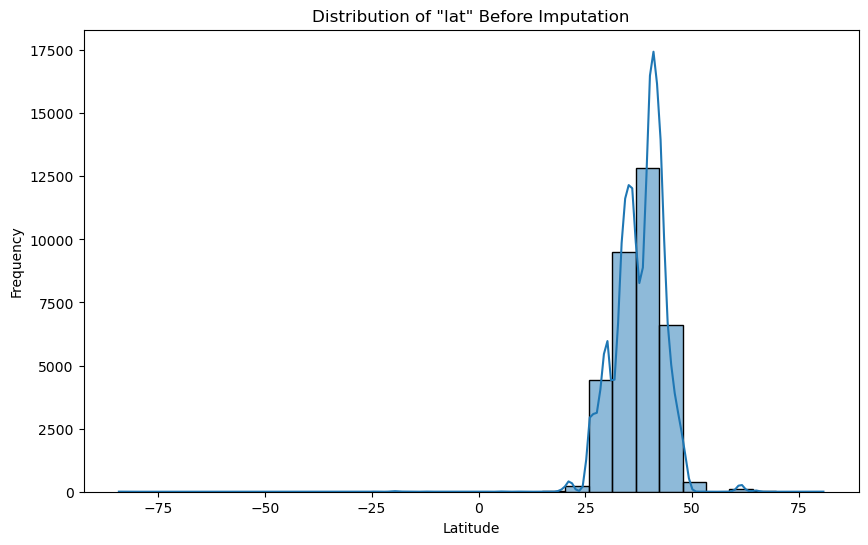

In [160]:
# Convert 'lat' column to numeric (this will turn non-numeric values to NaN)
df['lat'] = pd.to_numeric(df['lat'], errors='coerce')

# Plotting the distribution using a histogram
plt.figure(figsize=(10, 6))
sns.histplot(df['lat'], bins=30, kde=True)
plt.title('Distribution of "lat" Before Imputation')
plt.xlabel('Latitude')
plt.ylabel('Frequency')
plt.show()


The distribution is positively skewed (or right-skewed), meaning that most of the data is concentrated on the left, with a long tail stretching to the right hence __median__ is generally a better measure of central tendency than the mean because it is __less affected by the outliers and skewness.__
 

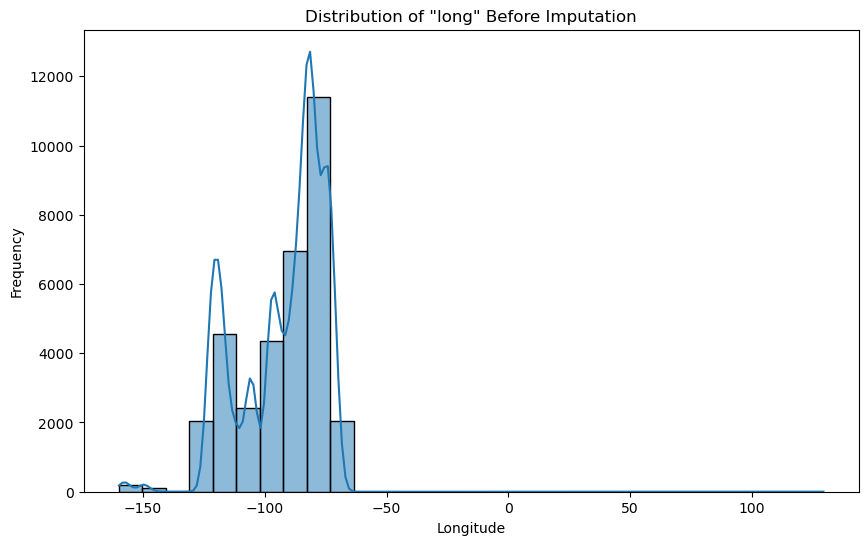

In [162]:
# Convert 'lat' column to numeric (this will turn non-numeric values to NaN)
df['long'] = pd.to_numeric(df['long'], errors='coerce')

# Plotting the distribution using a histogram
plt.figure(figsize=(10, 6))
sns.histplot(df['long'], bins=30, kde=True)
plt.title('Distribution of "long" Before Imputation')
plt.xlabel('Longitude')
plt.ylabel('Frequency')
plt.show()


The distribution of the "long" (longitude) variable is __positively skewed (right-skewed)__, with a significant concentration of values on the left and a long tail extending to the right. Given this skewness, similar to the latitude distribution, the __median__ would be a better measure for imputation.

### Imputing the 'lat' and 'long' missing values

In [165]:
# Calculate the median values
median_lat = df['lat'].median()
median_long = df['long'].median()

# Impute the missing values
df['lat'] = df['lat'].fillna(median_lat)
df['long'] = df['long'].fillna(median_long)

# Confirm that there are no more missing values
missing_values_after_imputation = df[['lat', 'long']].isnull().sum()
missing_values_after_imputation

lat     0
long    0
dtype: int64

## # 13. Paint Color

In [167]:
pd.set_option('display.max_colwidth', None)
df['paint_color'].head(60)

0        NaN
1        NaN
2        NaN
3        NaN
4        NaN
5        NaN
6        NaN
7        NaN
8        NaN
9        NaN
10       NaN
11       NaN
12       NaN
13       NaN
14       NaN
15       NaN
16       NaN
17       NaN
18       NaN
19       NaN
20       NaN
21       NaN
22       NaN
23       NaN
24       NaN
25       NaN
26       NaN
27     black
28     black
29     brown
30     white
31    yellow
32       NaN
33       NaN
34       NaN
35       NaN
36     white
37     green
38       NaN
39    silver
40     black
41       NaN
42       NaN
43    silver
44       NaN
45       NaN
46    silver
47     white
48     white
49      blue
50     brown
51     white
52       NaN
53     white
54    silver
55       NaN
56     white
57    silver
58       NaN
59       NaN
Name: paint_color, dtype: object

In [168]:
print("Current nulls in 'paint_color' column :", df['paint_color'].isna().sum())

Current nulls in 'paint_color' column : 12619


### List of Car Colors

In [170]:
def extract_color(description):
    """Extract color from description using predefined patterns."""
    for pattern in color_patterns:
        match = re.search(pattern, description, re.IGNORECASE)
        if match:
            return match.group(0)
    return np.nan  # Return NaN if no pattern matches


In [171]:
color_patterns = [
    r'\bRed\b', r'\bBlue\b', r'\bGreen\b', r'\bBlack\b', r'\bWhite\b',
    r'\bSilver\b', r'\bGray\b', r'\bYellow\b', r'\bOrange\b', r'\bBrown\b',
    r'\bPurple\b', r'\bBeige\b', r'\bPink\b', r'\bGold\b', r'\bTurquoise\b',
    r'\bTeal\b', r'\bBronze\b', r'\bMaroon\b', r'\bCopper\b', r'\bChampagne\b',
    r'\bDark Blue\b', r'\bDark Green\b', r'\bDark Gray\b', r'\bLight Blue\b',
    r'\bLight Green\b', r'\bLight Gray\b', r'\bMetallic\b'
]

Update 'paint_color' column with color extracted from description if it is NaN.

In [173]:
def update_paint_color(row):
    if pd.isna(row['paint_color']):
        return extract_color(row['description'])
    return row['paint_color']

df['paint_color'] = df.apply(update_paint_color, axis=1)

In [174]:
print("Current nulls in 'paint_color' column :", df['paint_color'].isna().sum())

Current nulls in 'paint_color' column : 11137


In [175]:
df['paint_color'].describe()

count     23099
unique       51
top       white
freq       4787
Name: paint_color, dtype: object

In [176]:
### Dropping the 'paint_color' column

In [177]:
df = df.drop(columns=['paint_color'])

In [178]:
 df.isnull().sum()

id                  0
url                 0
region              0
region_url          0
price               0
year               67
manufacturer     1026
model             199
condition        9118
cylinders       11094
fuel                8
odometer           67
title_status      121
transmission       67
VIN             23463
drive           11923
size            14420
type            10692
image_url          67
description         0
state               0
lat                 0
long                0
posting_date       67
dtype: int64

In [179]:
df = df.drop(columns=['VIN'])

In [180]:
# 1. Define a function to fill missing values based on related columns
def fill_missing_values(df):
    # For 'drive'
    drive_fill = df.groupby(['manufacturer', 'transmission'])['drive'].agg(lambda x: x.mode()[0] if not x.mode().empty else pd.NA)
    df['drive'] = df.apply(lambda row: drive_fill.get((row['manufacturer'], row['transmission']), row['drive']), axis=1)

    # For 'size'
    size_fill = df.groupby(['manufacturer', 'model'])['size'].agg(lambda x: x.mode()[0] if not x.mode().empty else pd.NA)
    df['size'] = df.apply(lambda row: size_fill.get((row['manufacturer'], row['model']), row['size']), axis=1)

    # For 'type'
    type_fill = df.groupby(['manufacturer', 'fuel'])['type'].agg(lambda x: x.mode()[0] if not x.mode().empty else pd.NA)
    df['type'] = df.apply(lambda row: type_fill.get((row['manufacturer'], row['fuel']), row['type']), axis=1)

    return df

# Apply the function
df = fill_missing_values(df)

# Check the DataFrame to confirm the missing values have been filled
print(df[['drive', 'size', 'type']].isna().sum())
print(df[['drive', 'size', 'type']].head())

drive     587
size     2606
type      453
dtype: int64
  drive  size type
0  None  None  NaN
1  None  None  NaN
2  None  None  NaN
3  None  None  NaN
4  None  None  NaN


In [181]:
 df.isnull().sum()

id                  0
url                 0
region              0
region_url          0
price               0
year               67
manufacturer     1026
model             199
condition        9118
cylinders       11094
fuel                8
odometer           67
title_status      121
transmission       67
drive             587
size             2606
type              453
image_url          67
description         0
state               0
lat                 0
long                0
posting_date       67
dtype: int64

In [182]:
# Step 1: Create a mapping from model to the most frequent manufacturer
model_to_manufacturer = df.groupby('model')['manufacturer'].apply(lambda x: x.mode()[0] if not x.mode().empty else None).to_dict()

# Step 2: Define a function to fill in the missing manufacturer based on model
def fill_missing_manufacturer(row):
    if pd.isna(row['manufacturer']):
        return model_to_manufacturer.get(row['model'], row['manufacturer'])
    return row['manufacturer']

# Step 3: Apply this function to the DataFrame
df['manufacturer'] = df.apply(fill_missing_manufacturer, axis=1)

In [183]:
 df.isnull().sum()

id                  0
url                 0
region              0
region_url          0
price               0
year               67
manufacturer     1026
model             199
condition        9118
cylinders       11094
fuel                8
odometer           67
title_status      121
transmission       67
drive             587
size             2606
type              453
image_url          67
description         0
state               0
lat                 0
long                0
posting_date       67
dtype: int64

In [184]:
df['manufacturer'] = df['manufacturer'].str.lower()
unique_manufacturer_values = df['manufacturer'].unique()
print(unique_manufacturer_values)

[None 'ford' 'toyota' 'chevy' 'acura' 'chevrolet' 'mercedes-benz' 'gmc'
 'nissan' 'honda' 'rover' 'ram' 'harley-davidson' 'pontiac' 'man' 'lexus'
 'jeep' 'dodge' 'hyundai' 'lincoln' 'audi' 'infiniti' 'cadillac' 'buick'
 'seat' 'volvo' 'saturn' 'bmw' 'suzuki' 'kia' 'chrysler' 'subaru'
 'volkswagen' 'mercury' 'mazda' 'isuzu' 'tesla' 'jaguar' 'porsche' 'mini'
 'mitsubishi' 'datsun' 'saab' 'fiat' 'oldsmobile' 'ferrari' 'jac' 'hino'
 'smart' "'land rover'" 'mercedes' 'bentley' 'hummer' 'land rover'
 'aston-martin' 'lamborghini' 'alfa-romeo' 'nio' 'morgan' 'opel'
 'maserati' 'tvr']


In [185]:
df['manufacturer'] = df['manufacturer'].fillna('Other')

In [186]:
 df.isnull().sum()

id                  0
url                 0
region              0
region_url          0
price               0
year               67
manufacturer        0
model             199
condition        9118
cylinders       11094
fuel                8
odometer           67
title_status      121
transmission       67
drive             587
size             2606
type              453
image_url          67
description         0
state               0
lat                 0
long                0
posting_date       67
dtype: int64

In [187]:
df['year'] = df['year'].str.lower()
unique_manufacturer_values = df['year'].unique()
print(unique_manufacturer_values)

[nan '2013.0' '2008.0' '1966.0' '2018.0' '2002.0' '1997.0' '1976.0'
 '2003.0' '1969.0' '2004.0' '1978.0' '2017.0' '1996.0' '2011.0' '2015.0'
 '2006.0' '2019.0' '2005.0' '2001.0' '2016.0' '1968.0' '2012.0' '2000.0'
 '2009.0' '2007.0' '2014.0' '2010.0' '1973.0' '1933.0' '1958.0' '1957.0'
 '1970.0' '1987.0' '1993.0' '1995.0' '1965.0' '1991.0' '1994.0' '1998.0'
 '1986.0' '1988.0' '1963.0' '1979.0' '1931.0' '1992.0' '1985.0' '1999.0'
 '1947.0' '1967.0' '1981.0' '1971.0' '1972.0' '2020.0' '1926.0' '1975.0'
 '1989.0' '1964.0' '2021.0' '1977.0' '1990.0' '1955.0' '1959.0' '1980.0'
 '1954.0' '1930.0' '1956.0' '1932.0' '1928.0' '1983.0' '1901.0' '1974.0'
 '1984.0' '1953.0' '1962.0' '1952.0' '1936.0' '1950.0' '1946.0' '1982.0'
 '1960.0' '1934.0' '1923.0' '1949.0' '1918.0' '1935.0' '1951.0' '1948.0'
 '1939.0' '1940.0' '1929.0' '1961.0' '1941.0' '2022.0' '1927.0' '1900.0'
 '1937.0' '1922.0' '1942.0' '1902.0' '1920.0' '1938.0' '1925.0']


In [188]:
df['year'] = df['year'].str.lower()
most_frequent_year = df['year'].mode()[0]  # mode() returns the most frequent value
df['year'] = df['year'].fillna(most_frequent_year)

In [189]:
 df.isnull().sum()

id                  0
url                 0
region              0
region_url          0
price               0
year                0
manufacturer        0
model             199
condition        9118
cylinders       11094
fuel                8
odometer           67
title_status      121
transmission       67
drive             587
size             2606
type              453
image_url          67
description         0
state               0
lat                 0
long                0
posting_date       67
dtype: int64

In [190]:
# Convert the 'model' column to lowercase (if necessary)
df['model'] = df['model'].str.lower()

# Drop rows where the 'model' column is NaN
df = df.dropna(subset=['model'])

# Verify the changes
print(df['model'].unique())


["'f-150 xlt'" "'fj cruiser'" "'1966 c-30 1 ton'" ...
 "'1500 longhorn 4x4'" "'fusco fec72s'" "'2010 f250 super duty'"]


In [191]:
 df.isnull().sum()

id                  0
url                 0
region              0
region_url          0
price               0
year                0
manufacturer        0
model               0
condition        8995
cylinders       10956
fuel                8
odometer            0
title_status       54
transmission        0
drive             520
size             2468
type              386
image_url           0
description         0
state               0
lat                 0
long                0
posting_date        0
dtype: int64

In [192]:
df['condition'] = df['condition'].str.lower()
unique_manufacturer_values = df['condition'].unique()
print(unique_manufacturer_values)

['excellent' 'good' 'new' nan "'like new'" 'fair' 'salvage']


In [193]:
condition_mode = df['condition'].mode()[0]
# Fill NaN values in the 'condition' column with the mode
df['condition'] = df['condition'].fillna(condition_mode)
# Verify the changes
unique_condition_values = df['condition'].unique()
print(unique_condition_values)

['excellent' 'good' 'new' "'like new'" 'fair' 'salvage']


In [194]:
 df.isnull().sum()

id                  0
url                 0
region              0
region_url          0
price               0
year                0
manufacturer        0
model               0
condition           0
cylinders       10956
fuel                8
odometer            0
title_status       54
transmission        0
drive             520
size             2468
type              386
image_url           0
description         0
state               0
lat                 0
long                0
posting_date        0
dtype: int64

In [195]:
df['title_status'] = df['title_status'].str.lower()
unique_title_status_values = df['title_status'].unique()
print(unique_title_status_values)

['clean' 'rebuilt' 'missing' 'lien' 'salvage' "'parts only'" None 'theft']


In [196]:
df = df.drop(columns=['cylinders'])

In [197]:
 df.isnull().sum()

id                 0
url                0
region             0
region_url         0
price              0
year               0
manufacturer       0
model              0
condition          0
fuel               8
odometer           0
title_status      54
transmission       0
drive            520
size            2468
type             386
image_url          0
description        0
state              0
lat                0
long               0
posting_date       0
dtype: int64

In [198]:
drive_mode = df['drive'].mode()[0]
# Fill NaN values in the 'condition' column with the mode
df['drive'] = df['drive'].fillna(drive_mode)
# Verify the changes
unique_drive_values = df['drive'].unique()
print(unique_drive_values)

['4wd' 'fwd' 'rwd' 'Rear-Wheel Drive' 'Front-Wheel Drive'
 'Traction Control' 'Four-Wheel Drive']


In [199]:
 df.isnull().sum()

id                 0
url                0
region             0
region_url         0
price              0
year               0
manufacturer       0
model              0
condition          0
fuel               8
odometer           0
title_status      54
transmission       0
drive              0
size            2468
type             386
image_url          0
description        0
state              0
lat                0
long               0
posting_date       0
dtype: int64

In [200]:
size_mode = df['size'].mode()[0]
# Fill NaN values in the 'condition' column with the mode
df['size'] = df['size'].fillna(size_mode)
# Verify the changes
unique_size_values = df['size'].unique()
print(unique_size_values)

['full-size' 'compact' 'mid-size' 'Huge' 'Convertible' 'CITY' 'Coupe'
 'coupe' 'bus' 'Premium' 'Sedan' 'sub-compact' 'convertible' 'small' 'VAN'
 'PREMIUM' 'luxury' 'City' 'Van' 'Camper' 'STANDARD' 'Crew Cab' 'Economy'
 'van' 'crew cab' 'sedan' 'extended' 'Luxury' 'standard' 'MOTORHOME'
 'SEDAN' 'EXTENDED' 'LUXURY' 'Suburban' 'HUGE' 'Regular' 'Small'
 'Standard' 'Mini' 'short bed' 'LONG BED' 'wagon' 'long bed' 'SMALL'
 'caravan' 'large' 'MINI' 'premium' 'hatchback' 'REGULAR' 'CONVERTIBLE'
 'Extended' 'city' 'WAGON' 'Wagon' 'camper' 'HATCHBACK' 'Long bed'
 'suburban' 'Medium' 'Large' 'Crew cab' 'Full-Size' 'Hatchback'
 'Super Crew' 'SUBURBAN' 'Fifth wheel' 'Compact' 'Tiny' 'Mid-Size' 'Bus'
 'COUPE' 'minivan' 'MINIVAN' 'Minivan' 'Short Bed' 'Long Bed' 'CREW CAB'
 'Utility Truck' 'huge' 'Limousine' 'regular' 'urban' 'toy hauler'
 'Utility Vehicle' 'Short bed' 'economy' 'UTILITY TRUCK' 'MEDIUM' 'mini'
 'Caravan' 'SHORT BED' 'BUS' 'Fifth Wheel']


In [201]:
 df.isnull().sum()

id                0
url               0
region            0
region_url        0
price             0
year              0
manufacturer      0
model             0
condition         0
fuel              8
odometer          0
title_status     54
transmission      0
drive             0
size              0
type            386
image_url         0
description       0
state             0
lat               0
long              0
posting_date      0
dtype: int64

In [202]:
title_status_mode = df['title_status'].mode()[0]
# Fill NaN values in the 'title_status' column with the mode
df['title_status'] = df['title_status'].fillna(title_status_mode)
# Verify the changes
unique_title_status_values = df['title_status'].unique()
print(unique_title_status_values)

['clean' 'rebuilt' 'missing' 'lien' 'salvage' "'parts only'" 'theft']


In [203]:
fuel_mode = df['fuel'].mode()[0]
# Fill NaN values in the 'fuel' column with the mode
df['fuel'] = df['fuel'].fillna(fuel_mode)
# Verify the changes
unique_fuel_values = df['fuel'].unique()
print(unique_fuel_values)

['gas' 'diesel' 'hybrid' 'other' 'electric' 'gasoline']


In [204]:
type_mode = df['type'].mode()[0]
# Fill NaN values in the 'type' column with the mode
df['type'] = df['type'].fillna(type_mode)
# Verify the changes
unique_type_values = df['type'].unique()
print(unique_type_values)

['truck' 'sedan' 'pickup' 'suv' 'Sedan' 'coupe' 'wagon' 'van' 'TRUCK'
 'Bus' 'convertible' 'hatchback' 'Electric' 'other' 'Motorcycle'
 'mini-van' 'Truck' 'bus' 'Hybrid' 'PICKUP' 'hybrid' 'RV' 'limo'
 'CLASSIC CAR' 'ELECTRIC' 'motorcycle' 'Convertible' 'Hatchback' 'Camper'
 'Coupe' 'Luxury' 'full-size' 'SUV' 'camper' 'Wagon' 'Van' 'offroad']


In [205]:
 df.isnull().sum()

id              0
url             0
region          0
region_url      0
price           0
year            0
manufacturer    0
model           0
condition       0
fuel            0
odometer        0
title_status    0
transmission    0
drive           0
size            0
type            0
image_url       0
description     0
state           0
lat             0
long            0
posting_date    0
dtype: int64

In [206]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 34037 entries, 27 to 34235
Data columns (total 22 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   id            34037 non-null  int64  
 1   url           34037 non-null  object 
 2   region        34037 non-null  object 
 3   region_url    34037 non-null  object 
 4   price         34037 non-null  int64  
 5   year          34037 non-null  object 
 6   manufacturer  34037 non-null  object 
 7   model         34037 non-null  object 
 8   condition     34037 non-null  object 
 9   fuel          34037 non-null  object 
 10  odometer      34037 non-null  object 
 11  title_status  34037 non-null  object 
 12  transmission  34037 non-null  object 
 13  drive         34037 non-null  object 
 14  size          34037 non-null  object 
 15  type          34037 non-null  object 
 16  image_url     34037 non-null  object 
 17  description   34037 non-null  object 
 18  state         34037 non-null  

In [207]:
df['posting_date'] = pd.to_datetime(df['posting_date'], format='%Y-%m-%dT%H:%M:%S%z', utc=True)

In [208]:
df['year'] = df['year'].astype(str).str.replace(r'\.0$', '', regex=True)  # Remove trailing '.0'
df['year'] = pd.to_numeric(df['year'], errors='coerce')  # Conv

In [209]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 34037 entries, 27 to 34235
Data columns (total 22 columns):
 #   Column        Non-Null Count  Dtype              
---  ------        --------------  -----              
 0   id            34037 non-null  int64              
 1   url           34037 non-null  object             
 2   region        34037 non-null  object             
 3   region_url    34037 non-null  object             
 4   price         34037 non-null  int64              
 5   year          34037 non-null  int64              
 6   manufacturer  34037 non-null  object             
 7   model         34037 non-null  object             
 8   condition     34037 non-null  object             
 9   fuel          34037 non-null  object             
 10  odometer      34037 non-null  object             
 11  title_status  34037 non-null  object             
 12  transmission  34037 non-null  object             
 13  drive         34037 non-null  object             
 14  size      

### Visualisation

Histogram: To visualize the distribution of car prices.

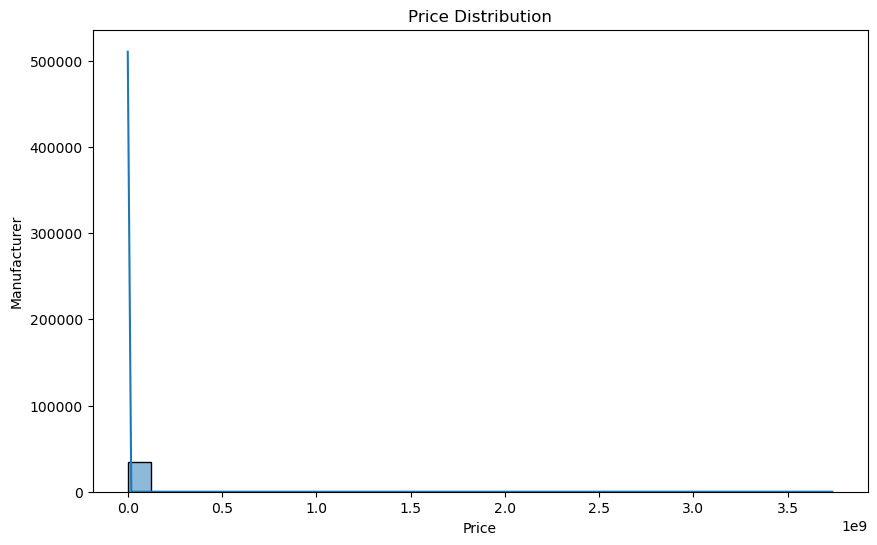

In [212]:
plt.figure(figsize=(10, 6))
sns.histplot(df['price'], bins=30, kde=True)
plt.title('Price Distribution')
plt.xlabel('Price')
plt.ylabel('Manufacturer')
plt.show()

Scatter Plot: To explore the relationship between car prices and the year of the car.

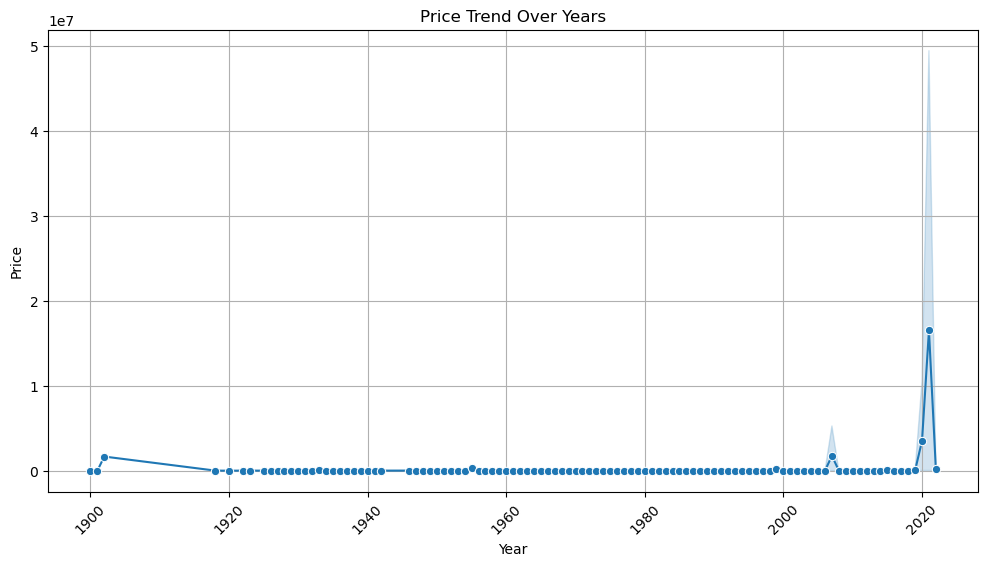

In [214]:
plt.figure(figsize=(12, 6))
sns.lineplot(x='year', y='price', data=df, marker='o')
plt.title('Price Trend Over Years')
plt.xlabel('Year')
plt.ylabel('Price')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

Pie Chart: To visualize the distribution of different fuel types.

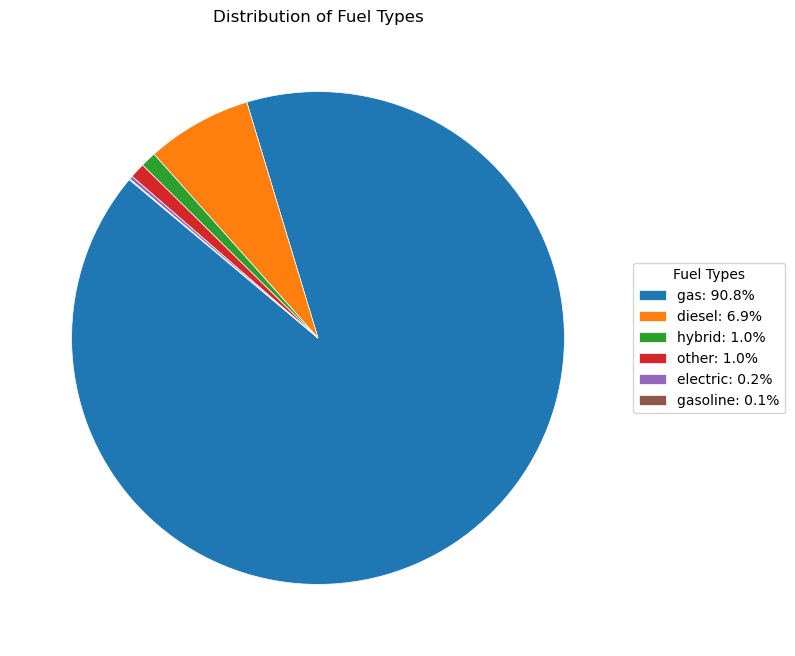

In [216]:
plt.figure(figsize=(8, 8))  # Reduce the figure size
fuel_counts = df['fuel'].value_counts()
wedges, texts = plt.pie(fuel_counts, labels=None, startangle=140, wedgeprops={'linewidth': 0.5, 'edgecolor': 'white'})
legend_labels = [f"{fuel}: {pct}" for fuel, pct in zip(fuel_counts.index, [f"{count / sum(fuel_counts) * 100:.1f}%" for count in fuel_counts])]
plt.legend(legend_labels, title="Fuel Types", loc="center left", bbox_to_anchor=(1, 0.5))
plt.title('Distribution of Fuel Types')
plt.show()

## Encoding Categorical Variables

#### One-Hot Encoding

__Advantages:__ It ensures that the model treats each category as distinct and unrelated, avoiding any assumptions about order.

__Limitations:__ One-hot encoding can increase the number of columns in your dataset, which might be a problem if the categorical variable has many unique categories.

One-Hot Encoding converts categorical data into a binary matrix, where a binary vector represents each category. This method is suitable for nominal data. Use Case: Most appropriate for those situations, where the categories do not have an inherent order, or there is a clear distinction between them.


In [222]:
label_encoder = LabelEncoder()
df['condition'] = label_encoder.fit_transform(df['condition'])

In [ ]:
# Identify categorical columns that are of dtype 'object'
categorical_columns = df.select_dtypes(include=['object']).columns

# Exclude columns that are numeric (int64 or float64)
numeric_columns = df.select_dtypes(include=['int64', 'float64','datetime64']).columns
columns_to_encode = categorical_columns.difference(numeric_columns)

# Convert the selected columns to string to ensure uniform data types
df[columns_to_encode] = df[columns_to_encode].astype(str)

# Initialize OneHotEncoder
onehot_encoder = OneHotEncoder(sparse_output=False, drop='first')  # drop='first' to avoid multicollinearity

# Apply OneHotEncoder to all categorical columns
encoded_data = onehot_encoder.fit_transform(df[columns_to_encode])

# Convert the result to a DataFrame
encoded_df = pd.DataFrame(encoded_data, columns=onehot_encoder.get_feature_names_out(columns_to_encode))

# Drop the original categorical columns that were encoded
df_encoded = df.drop(columns=columns_to_encode)

# Concatenate the original DataFrame (excluding encoded categorical columns) with the encoded DataFrame
df_encoded = pd.concat([df_encoded, encoded_df], axis=1)

print(df_encoded)

## Reducing Cardinality in Categorical Features

In [ ]:
df.head(10)

In [ ]:
# Count unique values for each categorical column
unique_counts = df.select_dtypes(include=['object']).nunique()
print(unique_counts)

#### Odometer (10207 unique values)
Binning: Convert continuous odometer readings into bins (e.g., 0-10,000, 10,001-50,000, 50,001-100,000, etc.).

In [ ]:
bins = [0, 10000, 50000, 100000, 150000, 200000, np.inf]
labels = ['0-10K', '10K-50K', '50K-100K', '100K-150K', '150K-200K', '200K+']
df['odometer_binned'] = pd.cut(df['odometer'].astype(float), bins=bins, labels=labels)

#### Image_url (28,861 unique values)

Grouping by Image Source

In [ ]:
from urllib.parse import urlparse
df['image_domain'] = df['image_url'].apply(lambda x: urlparse(x).netloc)

# Checking the distribution of domains
print(df['image_domain'].value_counts())


#### Description (28934 unique values)

In [ ]:
pip install --upgrade spacy

In [ ]:
pip install --upgrade spacy pydantic

In [ ]:
!python -m spacy download en_core_web_sm

In [ ]:
import spacy
nlp = spacy.load("en_core_web_sm")
print("SpaCy model loaded successfully.")

Reducing cardinality through Text Processing

#### 1. Loading the SpaCy Model

In [ ]:
nlp = spacy.load("en_core_web_sm")

#### 2. Defining the extract_entities Function
This function takes a text string as input, processes it with the SpaCy model (nlp(text)), and extracts named entities from the text. It returns a list of entity labels found in the text.

In [ ]:
def extract_entities(text):
    try:
        doc = nlp(text)
        entities = [ent.label_ for ent in doc.ents]
        return entities
    except Exception as e:
        print(f"Error extracting entities: {e}")
        return []

#### 3. Applying the Entity Extraction to the DataFrame

In [ ]:
df['description_entities'] = df['description'].apply(extract_entities)

#### 4. Categorizing Descriptions Based on Entities
Creates new categorical features based on the presence of specific entities:  
__has_damage__: Checks if the entity label DAMAGE is in the list of extracted entities.  
__has_parts__: Checks if the entity label PRODUCT is in the list.  
__mentions_owner__: Checks if the entity label PERSON is in the list.

In [ ]:
df['has_damage'] = df['description'].apply(lambda x: 'DAMAGE' in extract_entities(x))
df['has_parts'] = df['description'].apply(lambda x: 'PRODUCT' in extract_entities(x))
df['mentions_owner'] = df['description'].apply(lambda x: 'PERSON' in extract_entities(x))